In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [125]:
import math
import string
import operator

In [4]:
#from scipy.optimize import curve_fit

## Empirical data on survivorship curves
Name:
Latin name: Daphnia magna
Tmax = 90 days
F10: 0.17
F50: 0.44
Source: Bas, Fig. 6.1, p. 217

Name: Mice
Latin name: Mus musculus
Tmax = 1100 days
F10:650/1100 = 0.59
F50:860/1100 = 0.78
Source: Bas, Fig. 6.2, p.217

Name:Pond snail
Latin name:Lymnaea stagnalis
Tmax = 680 days
F10: 180/680 = 0.26
F50: 325/680 = 0.48
Source: Bas, Fig. 6.4, p. 219

Name: Guppie
Latin name: Poecilia reticulata
Tmax = 1750
F10: 750/1750 = 0.43
F50:1125/1750 = 0.64
Source: Bas, Fig. 6.3, p. 218

Name: Partenogenic rotifer
Latin name: Philodina citrina
Tmax = 31 days
F10: 15/31 = 0.48
F50:22.5/31 = 0.73
Source: Tuck, Fig. 9.4, p. 484

Name: Humans
Latin name: Homo sapiens 
Tmax = 32000
F10:12000/32000 = 0.375
F50: 21250/32000 = 0.66
Source: Tuck, Fig. 1.1, p. 14

Name: Guppie
Latin name: Lebistes reticulatus (SAME SPECIES AS ABOVE?)
Tmax = 1750
F10:750/1750 = 0.43
F50:  1100/1750 = 0.63
Source: Tuck, Fig. 3.6, p. 138

Name: Nematode
Latin name: C.elegans
Tmax:  37 days
F10:  11/37 = 0.30
F50:  18/37 = 0.49
Source: Tuck, Fig. 6.1, p. 302

Name: Bowl and doily spider
Latin name: Frontinella pyramitela
DOES NOT WORK - damage 50% of 1-epsilon at Tmax = 100
Tmax = 140 (longest to be conservative concerning somatic damage)
F10: 46/140 = 0.33
F50: 92/140 = 0.66

Tmax = 65 (5 flies/week)
F10 = 30/65 = 0.46
F50 = 43/65 = 0.66
Source: Tuck, Fig. 2.7, p. 77

Name: Fruitfly
Latin name: D. melanogaster
Tmax: 120
F10: 29/120 = 0.24
F50: 60/120 = 0.5
Source: Tuck, Fig. 2.4, p. 64 (L/15C)

Plot the positions in a separate graph, with labels for the species. Adjust parameters so that the simulated points are in the same ballpark.

For each point, find where kappa = 0.06, alpha = ?, exp = ? gives approximately this point at T = 200. The the lower kappa valuers will give longer max lifespans. Can the F10,F50 point be maintained and the Tmax be just moved upwards? 

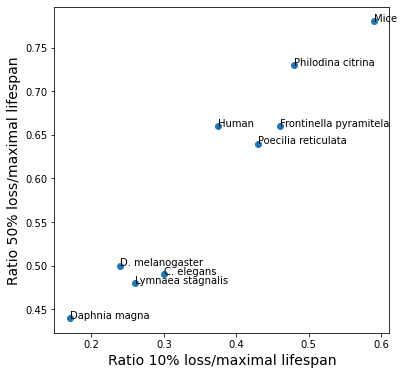

In [5]:
#plt.figure(figsize=(6,6)
x = [0.17,0.26,0.3,0.46,0.375,0.43,0.48,0.59,0.24]
y = [0.44,0.48,0.49,0.66,0.66,0.64,0.73,0.78,0.5]
n = ['Daphnia magna','Lymnaea stagnalis', 'C. elegans', 'Frontinella pyramitela','Human', 'Poecilia reticulata','Philodina citrina','Mice','D. melanogaster']

fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(x, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))

plt.ylabel("Ratio 50% loss/maximal lifespan",fontsize = 14)
plt.xlabel("Ratio 10% loss/maximal lifespan",fontsize=14);
#plt.savefig('RA_fig1.png', dpi = 600);

# Figure 1

Mean number of wildtype individuals left at T=100:  13.159999999999998
Mean number of wildtype individuals left at T=125:  4.600000000000003


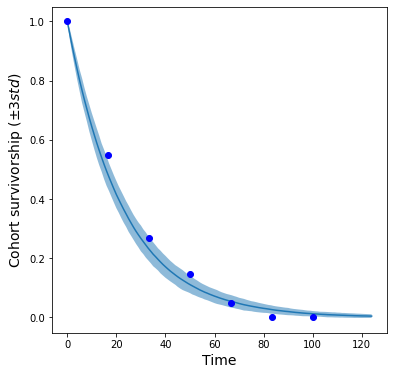

In [49]:
#Snippet showing the stochastic simulation of exponential decay as a function of Tmax, cohort size and a constat mortality risk. Frontinella data embedded.
#The simulation is repeated nrepeats times and plus-minus 3 standard deviations is plotted as a shade to give a feeling for the robustness of the cohort
#mortality curve.

p_wt = 0.043 #0.038 #0.061
nind = 1000; 
Tmax = 125;
nrepeats_wt = 100

C = np.arange(0,Tmax,1,dtype = int)

# With constant p_wt
H1_wt = np.zeros((nrepeats_wt,Tmax),dtype = int); 
for k in range(0,nrepeats_wt):
    s = np.ones((Tmax,nind),dtype = int); 
    for j in range(1,Tmax):
        for i in range(nind):
            ran = np.random.rand(1)
            if (s[j-1,i] == 1):
                if ran < p_wt:
                    s[j,i] = 0
            if (s[j-1,i] == 0):
                s[j,i] = 0
    H1_wt[k,:] = np.sum(s, axis = 1)
H1_wt_ND = H1_wt*(1/nind)    

#Plotting
plt.figure(figsize=(6,6))
mean_wt1_ND = np.mean(H1_wt_ND,axis = 0)
print('Mean number of wildtype individuals left at T=100: ',mean_wt1_ND[99]*nind)
print('Mean number of wildtype individuals left at T=125: ',mean_wt1_ND[124]*nind)
plt.plot(C,mean_wt1_ND);
std_H1_wt = np.std(H1_wt_ND,axis = 0)
plt.fill_between(range(Tmax), mean_wt1_ND-3.0*std_H1_wt, mean_wt1_ND+3.0*std_H1_wt, alpha = 0.5);
plt.xlabel("Time", fontsize=14)
plt.ylabel("Cohort survivorship ($\pm 3 std$)", fontsize=14);

#Plotting wild Frontinella data from Austad(1989)
plt.plot(0, 1.0,'bo');
#plt.plot(5*86/30, 0.5498,'bo')
#plt.plot(10*86/30, 0.268,'bo')
#plt.plot(15*86/30, 0.148,'bo')
#plt.plot(20*86/30, 0.05,'bo')
#plt.plot(25*86/30, 0.0016,'bo')
#plt.plot(30*86/30, 0.0,'bo')

plt.plot(5*100/30, 0.5498,'bo');
plt.plot(10*100/30, 0.268,'bo');
plt.plot(15*100/30, 0.148,'bo');
plt.plot(20*100/30, 0.05,'bo');
plt.plot(25*100/30, 0.0016,'bo');
plt.plot(30*100/30, 0.0,'bo');

In [264]:
#Fitting survivorship curves for captive Frontinella against Austad(1989) data as a function of alpha and kappa
Tmax_C = 217
#kappa = 0.031 #0.031 #0.04
#alpha = 0.0002258 #0.0000075/kappa 
nind = 1000; 
nrepeats_mut = 200 #100


#Data extracted from Austad (1989)
#Laboratory
#plt.plot(0, 1.0,'o')
#plt.plot(30*217/65, 0.8895,'ro')
#plt.plot(40*217/65, 0.592,'ro')
#plt.plot(51*217/65, 0.174,'ro')
#plt.plot(60*217/65, 0.0239,'ro')

X_C = np.round([30*217/65,40*217/65,51*217/65,60*217/65])
X_C = X_C.astype(int)
Y_C = [0.8895,0.592,0.174,0.0239]
Y_C = [nind * i for i in Y_C]
fit_C = []

for alpha in np.arange(0.000218,0.000226,0.0000005): #(0.000170,0.000235,0.000001):      #(0.000220,0.000229,0.000001):
    for kappa in np.arange(0.029,0.035,0.001): #(0.029,0.049,0.001):
        # Cohort survivorship protected environment
        H1_mut_C = np.zeros((nrepeats_mut,Tmax_C),dtype = int)
        for k in range(nrepeats_mut):
            s = np.ones((Tmax_C,nind),dtype = int); 
            for j in range(1,Tmax_C):
                for i in range(nind):
                    ran = np.random.rand(1)
                    if s[j-1,i] == 1:
                        if ran < alpha*(((1+kappa)**(j+1))-1):
                            s[j,i] = 0
                    if s[j-1,i] == 0:
                        s[j,i] = 0
            H1_mut_C[k,:] = np.sum(s, axis = 1)
        mean_mut_C = np.mean(H1_mut_C,axis = 0)
        
        # Square distance with data point and sum
        sum_square = (mean_mut_C[X_C[0]-1]-Y_C[0])**2 + (mean_mut_C[X_C[1]-1]-Y_C[1])**2 + (mean_mut_C[X_C[2]-1]-Y_C[2])**2 + (mean_mut_C[X_C[3]-1]-Y_C[3])**2 
        
        # Store in array
        fit_C.append([alpha,kappa,sum_square])
# Find 10 lowest sum square values and list parameters + values
best_fits = sorted(fit_C, key=operator.itemgetter(2))
print(*best_fits[0:10], sep = "\n")

[0.00022000000000000006, 0.033, 1167.4288500000011]
[0.00022350000000000015, 0.033, 1189.2856999999967]
[0.00022300000000000013, 0.033, 1211.4286749999987]
[0.00022400000000000016, 0.033, 1214.0357500000023]
[0.00022100000000000009, 0.033, 1216.0673499999987]
[0.0002220000000000001, 0.033, 1224.2566000000027]
[0.00022450000000000017, 0.033, 1241.5576749999975]
[0.00022250000000000012, 0.033, 1244.6669500000012]
[0.00021900000000000004, 0.033, 1253.8345749999987]
[0.00021950000000000005, 0.033, 1270.834949999999]


nrepeats = 200:

for alpha in np.arange(0.000218,0.000226,0.0000005): #(0.000170,0.000235,0.000001):      #(0.000220,0.000229,0.000001):
    for kappa in np.arange(0.029,0.035,0.001): #(0.029,0.049,0.001):
[0.00022000000000000006, 0.033, 1167.4288500000011]
[0.00022350000000000015, 0.033, 1189.2856999999967]
[0.00022300000000000013, 0.033, 1211.4286749999987]
[0.00022400000000000016, 0.033, 1214.0357500000023]
[0.00022100000000000009, 0.033, 1216.0673499999987]
[0.0002220000000000001, 0.033, 1224.2566000000027]
[0.00022450000000000017, 0.033, 1241.5576749999975]
[0.00022250000000000012, 0.033, 1244.6669500000012]
[0.00021900000000000004, 0.033, 1253.8345749999987]
[0.00021950000000000005, 0.033, 1270.834949999999]

nrepeats = 20:
[0.000222, 0.033, 1270.9699999999991]
[0.000221, 0.033, 1426.7049999999988]
[0.000221, 0.034, 3093.492500000002]
[0.000222, 0.034, 3232.0050000000006]
[0.000221, 0.032, 4490.309999999998]
[0.000222, 0.032, 4767.6924999999965]
[0.000221, 0.035, 11093.9925]
[0.000222, 0.035, 11761.862500000007]
[0.000222, 0.031000000000000003, 15801.714999999998]
[0.000221, 0.031000000000000003, 17560.545000000013]

In [273]:
#Fitting survivorship curves for wild Frontinella against Austad(1989) data as a function of epsilon and p_wt
Tmax_W = 100
kappa = 0.033
alpha = 0.000222 
nind = 1000; 
nrepeats_mut = 200 #100


#Data extracted from Austad (1989)
#Wild
#plt.plot(0, 1.0,'bo')
#plt.plot(5*100/30, 0.5498,'bo')
#plt.plot(10*100/30, 0.268,'bo')
#plt.plot(15*100/30, 0.148,'bo')
#plt.plot(20*100/30, 0.05,'bo')
#plt.plot(25*100/30, 0.0016,'bo') NOT INCORPORATED
#plt.plot(30*100/30, 0.0,'bo')

X_W = np.round([5*100/30,10*100/30,15*100/30,20*100/30,30*100/30])
X_W = X_W.astype(int)
Y_W = [0.5498,0.268,0.148,0.05,0.0]
Y_W = [nind * i for i in Y_W]
fit_W = []

for epsilon in np.arange(0.039,0.0398,0.0001):
    for p_wt in np.arange(0.0391,0.0392,0.0001): 
        # Cohort survivorship protected environment
        H1_mut_W = np.zeros((nrepeats_mut,Tmax_W),dtype = int)
        for k in range(nrepeats_mut):
            s = np.ones((Tmax_W,nind),dtype = int); 
            for j in range(1,Tmax_W):
                for i in range(nind):
                    ran = np.random.rand(1)
                    if s[j-1,i] == 1:
                        if ran < (1-epsilon)*p_wt + alpha*(((1+kappa)**(j+1))-1):
                            s[j,i] = 0
                    if s[j-1,i] == 0:
                        s[j,i] = 0
            H1_mut_W[k,:] = np.sum(s, axis = 1)
        mean_mut_W = np.mean(H1_mut_W,axis = 0)
        
        # Square distance with data point and sum
        sum_square = (mean_mut_W[X_W[0]-1]-Y_W[0])**2 + (mean_mut_W[X_W[1]-1]-Y_W[1])**2 + (mean_mut_W[X_W[2]-1]-Y_W[2])**2 + (mean_mut_W[X_W[3]-1]-Y_W[3])**2 + (mean_mut_W[X_W[4]-1]-Y_W[4])**2 
        
        # Store in array
        fit_W.append([epsilon,p_wt,sum_square])
# Find 10 lowest sum square values and list parameters + values
best_fits = sorted(fit_W, key=operator.itemgetter(2))
print(*best_fits[0:10], sep = "\n")

[0.039200000000000006, 0.0391, 1714.0154999999997]
[0.03960000000000002, 0.0391, 1740.0199750000006]
[0.03970000000000002, 0.0391, 1746.379974999999]
[0.039, 0.0391, 1756.9554749999988]
[0.03930000000000001, 0.0391, 1767.6929999999986]
[0.03940000000000001, 0.0391, 1771.9527749999977]
[0.0391, 0.0391, 1777.8134999999997]
[0.039500000000000014, 0.0391, 1794.5885750000004]
[0.03980000000000002, 0.0391, 1907.8378999999982]


nrepeats = 200
fixed epsilon
for epsilon in np.arange(0.039,0.0398,0.0001):
    for p_wt in np.arange(0.0391,0.0392,0.0001): 
[0.039200000000000006, 0.0391, 1714.0154999999997]
[0.03960000000000002, 0.0391, 1740.0199750000006]
[0.03970000000000002, 0.0391, 1746.379974999999]
[0.039, 0.0391, 1756.9554749999988]
[0.03930000000000001, 0.0391, 1767.6929999999986]
[0.03940000000000001, 0.0391, 1771.9527749999977]
[0.0391, 0.0391, 1777.8134999999997]
[0.039500000000000014, 0.0391, 1794.5885750000004]
[0.03980000000000002, 0.0391, 1907.8378999999982]



nrepeats = 200
fixed epsilon
for epsilon in np.arange(0.039,0.042,0.0005):
    for p_wt in np.arange(0.0391,0.0392,0.0001): 
[0.0395, 0.0391, 1694.5399749999983]
[0.041, 0.0391, 1732.0317249999996]
[0.04, 0.0391, 1734.6882]
[0.039, 0.0391, 1789.8995249999987]
[0.042, 0.0391, 1800.6082]
[0.0415, 0.0391, 1814.181575]
[0.0405, 0.0391, 1844.8850499999994]



nrepeats = 200:
for epsilon in np.arange(0.012,0.05,0.0005):
    for p_wt in np.arange(0.036,0.045,0.0005):
0.012, 0.0395, 1165.9520749999988]
[0.04200000000000002, 0.0405, 1177.1398499999991]
[0.03500000000000002, 0.04, 1206.1178499999974]
[0.020000000000000007, 0.0395, 1207.4373249999994]
[0.04550000000000003, 0.041, 1226.6341249999975]
[0.034000000000000016, 0.0405, 1228.8784499999983]
[0.034000000000000016, 0.04, 1231.8165749999987]
[0.03500000000000002, 0.0405, 1235.4098499999964]
[0.04100000000000002, 0.0405, 1242.549074999999]
[0.014500000000000002, 0.0395, 1246.2369749999978]


nrepeats = 200:
[0.03700000000000001, 0.04, 1181.6149999999975]
[0.030000000000000006, 0.04, 1213.8399999999976]
[0.028000000000000004, 0.04, 1222.6649999999975]
[0.027000000000000003, 0.041, 1228.035]
[0.031000000000000007, 0.04, 1270.635]
[0.03300000000000001, 0.04, 1280.8149999999964]
[0.03700000000000001, 0.041, 1287.9449999999968]
[0.03500000000000001, 0.04, 1288.1499999999983]
[0.039000000000000014, 0.04, 1311.024999999998]
[0.03600000000000001, 0.041, 1315.2299999999977]

In [271]:
#Fitting survivorship curves for imaginary wild type Frontinella against Austad(1989) data as a function of p_wt with epsilon = 0

Tmax_W = 100
nind = 1000; 
nrepeats_mut = 200 #50 #100

#Data extracted from Austad (1989)
#Wild
#plt.plot(0, 1.0,'bo')
#plt.plot(5*100/30, 0.5498,'bo')
#plt.plot(10*100/30, 0.268,'bo')
#plt.plot(15*100/30, 0.148,'bo')
#plt.plot(20*100/30, 0.05,'bo')
#plt.plot(25*100/30, 0.0016,'bo') NOT INCORPORATED
#plt.plot(30*100/30, 0.0,'bo')

X_W = np.round([5*100/30,10*100/30,15*100/30,20*100/30,30*100/30])
X_W = X_W.astype(int)
Y_W = [0.5498,0.268,0.148,0.05,0.0]
Y_W = [nind * i for i in Y_W]
fit_W = []

for p_wt in np.arange(0.039,0.0399,0.0001): 
    # Cohort survivorship protected environment
    H1_mut_W = np.zeros((nrepeats_mut,Tmax_W),dtype = int)
    for k in range(nrepeats_mut):
        s = np.ones((Tmax_W,nind),dtype = int); 
        for j in range(1,Tmax_W):
            for i in range(nind):
                ran = np.random.rand(1)
                if s[j-1,i] == 1:
                    if ran < p_wt:
                        s[j,i] = 0
                if s[j-1,i] == 0:
                    s[j,i] = 0
        H1_mut_W[k,:] = np.sum(s, axis = 1)
    mean_mut_W = np.mean(H1_mut_W,axis = 0)

    # Square distance with data points and sum
    #sum_square = (mean_mut_W[X_W[0]-1]-Y_W[0])**2 + (mean_mut_W[X_W[1]-1]-Y_W[1])**2 + (mean_mut_W[X_W[2]-1]-Y_W[2])**2 + (mean_mut_W[X_W[3]-1]-Y_W[3])**2 + (mean_mut_W[X_W[4]-1]-Y_W[4])**2
    sum_square = (mean_mut_W[X_W[0]-1]-Y_W[0])**2 + (mean_mut_W[X_W[1]-1]-Y_W[1])**2 + (mean_mut_W[X_W[2]-1]-Y_W[2])**2 

    # Store in array
    fit_W.append([p_wt,sum_square])
# Find 10 lowest sum square values and list parameters + values
best_fits = sorted(fit_W, key=operator.itemgetter(2))
print(*best_fits[0:10], sep = "\n")

[0.04, 0.0391, 600.54335]
[0.04, 0.039, 601.9577250000002]
[0.04, 0.03930000000000001, 632.1750749999991]
[0.04, 0.039200000000000006, 669.8504749999998]
[0.04, 0.03940000000000001, 672.156949999998]
[0.04, 0.039500000000000014, 745.4355249999982]
[0.04, 0.03960000000000002, 773.5760249999987]
[0.04, 0.03970000000000002, 801.4614249999966]
[0.04, 0.03980000000000002, 826.1941249999961]


nrepeats = 200:
all five data points..
for p_wt in np.arange(0.039,0.041,0.0001): 
[0.0, 0.039200000000000006, 1425.4922749999994]
[0.0, 0.039500000000000014, 1428.6349749999954]
[0.0, 0.0391, 1436.9086000000004]
[0.0, 0.03940000000000001, 1487.1552749999985]
[0.0, 0.03980000000000002, 1530.9760250000002]
[0.0, 0.039, 1559.0613749999966]
[0.0, 0.03960000000000002, 1583.693399999999]
[0.0, 0.03970000000000002, 1586.326649999999]
[0.0, 0.03930000000000001, 1588.0314999999982]
[0.0, 0.04010000000000003, 1615.243449999998]

nrepeats = 200
just three first data points
e = 0, not 0.4..
[0.04, 0.0391, 600.54335]
[0.04, 0.039, 601.9577250000002]
[0.04, 0.03930000000000001, 632.1750749999991]
[0.04, 0.039200000000000006, 669.8504749999998]
[0.04, 0.03940000000000001, 672.156949999998]
[0.04, 0.039500000000000014, 745.4355249999982]
[0.04, 0.03960000000000002, 773.5760249999987]
[0.04, 0.03970000000000002, 801.4614249999966]
[0.04, 0.03980000000000002, 826.1941249999961]

In [270]:
#Fitting survivorship curves for wild Frontinella against Austad(1989) data as a function of p_wt with fixed epsilon
#Has to change p_wt for each epsilon in order to fit data
Tmax_W = 100
kappa = 0.033
alpha = 0.000222 
nind = 1000; 
nrepeats_mut = 200 #50 #100

epsilon = 0.04


#Data extracted from Austad (1989)
#Wild
#plt.plot(0, 1.0,'bo')
#plt.plot(5*100/30, 0.5498,'bo')
#plt.plot(10*100/30, 0.268,'bo')
#plt.plot(15*100/30, 0.148,'bo')
#plt.plot(20*100/30, 0.05,'bo')
#plt.plot(25*100/30, 0.0016,'bo') NOT INCORPORATED
#plt.plot(30*100/30, 0.0,'bo')

X_W = np.round([5*100/30,10*100/30,15*100/30,20*100/30,30*100/30])
X_W = X_W.astype(int)
Y_W = [0.5498,0.268,0.148,0.05,0.0]
Y_W = [nind * i for i in Y_W]
fit_W = []

for p_wt in np.arange(0.039,0.041,0.0001): 
    # Cohort survivorship protected environment
    H1_mut_W = np.zeros((nrepeats_mut,Tmax_W),dtype = int)
    for k in range(nrepeats_mut):
        s = np.ones((Tmax_W,nind),dtype = int); 
        for j in range(1,Tmax_W):
            for i in range(nind):
                ran = np.random.rand(1)
                if s[j-1,i] == 1:
                    if ran < (1-epsilon)*p_wt + alpha*(((1+kappa)**(j+1))-1):
                        s[j,i] = 0
                if s[j-1,i] == 0:
                    s[j,i] = 0
        H1_mut_W[k,:] = np.sum(s, axis = 1)
    mean_mut_W = np.mean(H1_mut_W,axis = 0)

    # Square distance with data point and sum
    sum_square = (mean_mut_W[X_W[0]-1]-Y_W[0])**2 + (mean_mut_W[X_W[1]-1]-Y_W[1])**2 + (mean_mut_W[X_W[2]-1]-Y_W[2])**2 + (mean_mut_W[X_W[3]-1]-Y_W[3])**2 + (mean_mut_W[X_W[4]-1]-Y_W[4])**2 

    # Store in array
    fit_W.append([epsilon,p_wt,sum_square])
# Find 10 lowest sum square values and list parameters + values
best_fits = sorted(fit_W, key=operator.itemgetter(2))
print(*best_fits[0:10], sep = "\n")

[0.04, 0.04040000000000004, 1264.827449999997]
[0.04, 0.040200000000000034, 1267.527724999999]
[0.04, 0.040600000000000046, 1270.318374999996]
[0.04, 0.04100000000000006, 1281.1003999999994]
[0.04, 0.04010000000000003, 1303.3260249999958]
[0.04, 0.04080000000000005, 1304.0455999999997]
[0.04, 0.039900000000000026, 1314.0333249999992]
[0.04, 0.04070000000000005, 1317.4945999999957]
[0.04, 0.04050000000000004, 1333.5081999999993]
[0.04, 0.03980000000000002, 1339.6233749999988]


[0.02, 0.03970000000000002, 1214.0306499999997]
[0.02, 0.03960000000000002, 1215.5415999999989]
[0.02, 0.03980000000000002, 1271.546924999999]
[0.02, 0.03930000000000001, 1281.6116499999987]
[0.02, 0.0391, 1325.1171250000004]
[0.02, 0.04010000000000003, 1326.3067999999962]
[0.02, 0.039900000000000026, 1330.6339750000002]
[0.02, 0.039200000000000006, 1334.8528749999975]
[0.02, 0.040200000000000034, 1343.208874999996]
[0.02, 0.03940000000000001, 1344.4907249999983]

nrepeats = 200:
[0.03, 0.039900000000000026, 1264.2274499999996]
[0.03, 0.04010000000000003, 1276.1045749999962]
[0.03, 0.040200000000000034, 1296.726349999997]
[0.03, 0.040600000000000046, 1302.2871749999977]
[0.03, 0.04000000000000003, 1302.432849999997]
[0.03, 0.04030000000000004, 1315.4612000000002]
[0.03, 0.03980000000000002, 1326.9539999999997]
[0.03, 0.04040000000000004, 1341.9385249999987]
[0.03, 0.03970000000000002, 1344.629850000001]
[0.03, 0.03960000000000002, 1368.328349999998]

nrepeats= 200:

[0.04, 0.04040000000000004, 1264.827449999997]
[0.04, 0.040200000000000034, 1267.527724999999]
[0.04, 0.040600000000000046, 1270.318374999996]
[0.04, 0.04100000000000006, 1281.1003999999994]
[0.04, 0.04010000000000003, 1303.3260249999958]
[0.04, 0.04080000000000005, 1304.0455999999997]
[0.04, 0.039900000000000026, 1314.0333249999992]
[0.04, 0.04070000000000005, 1317.4945999999957]
[0.04, 0.04050000000000004, 1333.5081999999993]
[0.04, 0.03980000000000002, 1339.6233749999988]

[0.05, 0.040500000000000015, 1241.068700000001]
[0.05, 0.04110000000000003, 1247.6799999999969]
[0.05, 0.04070000000000002, 1260.3306999999993]
[0.05, 0.04060000000000002, 1265.0822999999964]
[0.05, 0.040100000000000004, 1265.2931000000012]
[0.05, 0.04090000000000003, 1285.2705999999982]
[0.05, 0.04040000000000001, 1302.5891999999978]
[0.05, 0.04130000000000004, 1304.987199999998]
[0.05, 0.041200000000000035, 1318.0942000000005]
[0.05, 0.041500000000000044, 1318.6206999999956]

[0.07, 0.04170000000000005, 1169.7080999999976]
[0.07, 0.04230000000000007, 1216.0501000000006]
[0.07, 0.04160000000000005, 1222.2740999999996]
[0.07, 0.041900000000000055, 1270.2798999999993]
[0.07, 0.041500000000000044, 1271.0056999999958]
[0.07, 0.04200000000000006, 1273.6929999999966]
[0.07, 0.04140000000000004, 1314.5473]
[0.07, 0.041200000000000035, 1322.234099999997]
[0.07, 0.04110000000000003, 1337.271099999997]
[0.07, 0.04130000000000004, 1347.809999999998]

Mean number of mutant individuals in captvity left at Tmax_C:  0.17
Mean number of mutant individuals left at Tmax_W:  19.19
Mean number of wildtype individuals left at Tmax_W:  18.885
Mean number of wildtype individuals left at Tmax_wt:  5.725


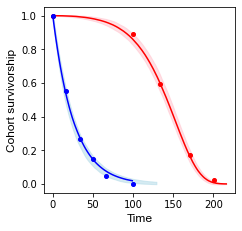

In [274]:
#Calculating survivorship curves for mutant captive Frontinella, mutant wild Frontinella  + stipulated wildtype Frontinella
Tmax_C = 217
Tmax_W = 100
Tmax_WT = 130
kappa = 0.033 
alpha = 0.000222 
nind = 1000; 
nrepeats_mut = 200
p_wt_wt = 0.0391
p_wt_mut = 0.0391 
epsilon = 0.0392 #0.03 #0.07 #0.04


# Cohort survivorship protected environment
H1_mut_C = np.zeros((nrepeats_mut,Tmax_C),dtype = int)
for k in range(nrepeats_mut):
    s = np.ones((Tmax_C,nind),dtype = int); 
    for j in range(1,Tmax_C):
        for i in range(nind):
            ran = np.random.rand(1)
            if s[j-1,i] == 1:
                if ran < alpha*(((1+kappa)**(j+1))-1):
                    s[j,i] = 0
            if s[j-1,i] == 0:
                s[j,i] = 0
    H1_mut_C[k,:] = np.sum(s, axis = 1)

mean_mut_C = np.mean(H1_mut_C,axis = 0)

# Cohort survivorship mutant wild
H1_mut_W = np.zeros((nrepeats_mut,Tmax_W),dtype = int)
for k in range(nrepeats_mut):
    s = np.ones((Tmax_W,nind),dtype = int); 
    for j in range(1,Tmax_W):
        for i in range(nind):
            ran = np.random.rand(1)
            if s[j-1,i] == 1:
                if ran < (1-epsilon)*p_wt_mut + alpha*(((1+kappa)**(j+1))-1):
                    s[j,i] = 0
            if s[j-1,i] == 0:
                s[j,i] = 0
    H1_mut_W[k,:] = np.sum(s, axis = 1)
mean_mut_W = np.mean(H1_mut_W,axis = 0)

# Cohort survivorship stipulated wildtype based on mutant parameter values
# with constant p_wt found by least squares fitting
H1_wt = np.zeros((nrepeats_mut,Tmax_WT),dtype = int); 
for k in range(0,nrepeats_mut):
    s = np.ones((Tmax_WT,nind),dtype = int); 
    for j in range(1,Tmax_WT):
        for i in range(nind):
            ran = np.random.rand(1)
            if (s[j-1,i] == 1):
                if ran < p_wt_wt:
                    s[j,i] = 0
            if (s[j-1,i] == 0):
                s[j,i] = 0
    H1_wt[k,:] = np.sum(s, axis = 1) 
mean_wt = np.mean(H1_wt,axis = 0)

# Recording
print('Mean number of mutant individuals in captvity left at Tmax_C: ',mean_mut_C[Tmax_C-1])
print('Mean number of mutant individuals left at Tmax_W: ',mean_mut_W[Tmax_W-1])
print('Mean number of wildtype individuals left at Tmax_W: ',mean_wt[Tmax_W-1])
print('Mean number of wildtype individuals left at Tmax_wt: ',mean_wt[Tmax_WT-1])

# Normalize + calculate stds
mean_mut_C = mean_mut_C*(1/nind)
std_mut_C = np.std(H1_mut_C*(1/nind),axis = 0)
mean_mut_W = mean_mut_W*(1/nind)
std_mut_W = np.std(H1_mut_W*(1/nind),axis = 0)
mean_wt = mean_wt*(1/nind)
std_wt = np.std(H1_wt*(1/nind),axis = 0)

# Plotting
C1 = np.arange(0,Tmax_C,1,dtype = int)
C2 = np.arange(0,Tmax_mut,1,dtype = int)
C3 = np.arange(0,Tmax_WT,1,dtype = int)

fig1,ax = plt.subplots(figsize=(6,6))
#plt.plot(C1,mean_mut_C,'r-')
#plt.fill_between(range(Tmax_C), mean_mut_C-3.0*std_mut_C, mean_mut_C+3.0*std_mut_C, color='pink', alpha = 0.5)
#plt.plot(C2,mean_mut_W,'b-')
#plt.fill_between(range(Tmax_WT), mean_wt-3.0*std_wt, mean_wt+3.0*std_wt, color = 'lightblue', alpha = 0.5);
ax.plot(C1,mean_mut_C,'r-')
ax.fill_between(range(Tmax_C), mean_mut_C-3.0*std_mut_C, mean_mut_C+3.0*std_mut_C, color='pink', alpha = 0.5)
ax.plot(C2,mean_mut_W,'b-')
#plt.plot(C3,mean_wt,'g-')
ax.fill_between(range(Tmax_WT), mean_wt-3.0*std_wt, mean_wt+3.0*std_wt, color = 'lightblue', alpha = 0.5);

#Data extracted from Austad (1989)
#Laboratory
#plt.plot(0, 1.0,'o')
#plt.plot(30*217/65, 0.8895,'ro')
#plt.plot(40*217/65, 0.592,'ro')
#plt.plot(51*217/65, 0.174,'ro')
#plt.plot(60*217/65, 0.0239,'ro')

X_C = [0,30*217/65,40*217/65,51*217/65,60*217/65]
Y_C = [1.0,0.8895,0.592,0.174,0.0239]
ax.plot(X_C,Y_C,'ro',markersize=4)

X_W = [0,5*100/30,10*100/30,15*100/30,20*100/30,30*100/30]
Y_W = [1.0,0.5498,0.268,0.148,0.05,0.0]
ax.plot(X_W,Y_W,'bo',markersize=4)

#Data extracted from Austad (1989)
#Wild
#plt.plot(0, 1.0,'bo')
#plt.plot(5*100/30, 0.5498,'bo')
#plt.plot(10*100/30, 0.268,'bo')
#plt.plot(15*100/30, 0.148,'bo')
#plt.plot(20*100/30, 0.05,'bo')
#plt.plot(25*100/30, 0.0016,'bo')
#plt.plot(30*100/30, 0.0,'bo')

#plt.xlabel("Time",fontsize = 14)
#plt.ylabel("Cohort survivorship",fontsize = 14);
afont = {'fontname':'Arial'}
ax.set_xlabel("Time",fontsize = 12,**afont)
ax.set_ylabel("Cohort survivorship",fontsize = 12,**afont);

x_size = 10
plt.rc('xtick',labelsize=x_size)
y_size = 10
plt.rc('ytick',labelsize=y_size)

fig.tight_layout()

figure = plt.gcf()
figure.set_size_inches(3.42, 3.42)

plt.savefig('RA_fig1_Frontinella.pdf', dpi = 600, bbox_inches="tight");

# Figure 2

In [198]:
p_wt[0]

0.0399

p_mut crosses p_wt at T =  56.00
p_mut crosses p_wt at T =  71.00
p_mut crosses p_wt at T =  81.00


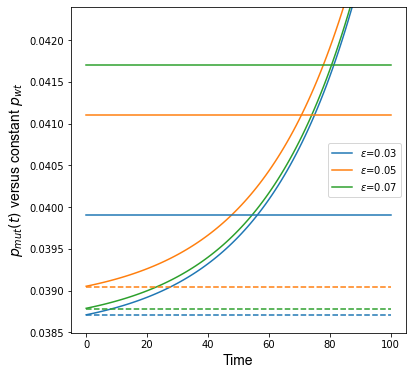

In [203]:
### Calculates the mutant mortality risk coefficient relative to the wild type coefficient across the time span
#Adjusts for varying p_wt

Tmax = 100
kappa = 0.033
alpha = 0.000222

epsilon = [0.02, 0.03, 0.04]
p_wt = np.array([0.0397, 0.0399, 0.0404])

C = np.arange(0,Tmax,1,dtype = int)

#plt.figure(figsize=(6,6))
fig1,ax = plt.subplots(figsize=(6,6))
#plt.subplots(2,1,figsize=(6,12))
#plt.subplot(211)
mut_dam = np.zeros((3,Tmax))
for m in range(3):
    for j in range(0,Tmax):  
            mut_dam[m,j] = (1-epsilon[m])*p_wt[m] + alpha*(((1+kappa)**(j+1))-1)
    idx = (np.abs(mut_dam[m,1:Tmax-1] - p_wt[m])).argmin() 
    print("p_mut crosses p_wt at T =  %.2f" % (idx+1))                       
    if m==0:
        l1, = ax.plot(C,mut_dam[0,:])
    if m==1:
        l2, = ax.plot(C,mut_dam[1,:])
    if m==2:
        l3, = ax.plot(C,mut_dam[2,:])
        
afont = {'fontname':'Arial'}
ax.set_xlabel("Time",fontsize = 14,**afont)
ax.set_ylabel("$p_{mut}(t)$ versus constant $p_{wt}$",fontsize = 14,**afont);


ax.plot([0,Tmax],[p_wt[0],p_wt[0]],'C0-');
ax.plot([0,Tmax],[p_wt[1],p_wt[1]],'C1-');       
ax.plot([0,Tmax],[p_wt[2],p_wt[2]],'C2-');        
        
        
ax.plot([0,Tmax],[(1-epsilon[0])*p_wt[0],(1-epsilon[0])*p_wt[0]],'C0--');
ax.plot([0,Tmax],[(1-epsilon[1])*p_wt[1],(1-epsilon[1])*p_wt[1]],'C1--');
ax.plot([0,Tmax],[(1-epsilon[2])*p_wt[2],(1-epsilon[2])*p_wt[2]],'C2--');
#plt.plot([0,Tmax],[(1-epsilon[3])*p_wt1,(1-epsilon[3])*p_wt1],'C3--');
#plt.plot([0,Tmax],[(1-epsilon[4])*p_wt1,(1-epsilon[4])*p_wt1],'C4--');

ax.legend((l1,l2,l3),('$\epsilon$=0.03', '$\epsilon$=0.05', '$\epsilon$=0.07'))

ax.set_ylim((1-epsilon[1])*p_wt[1]-0.00055,p_wt[1]+0.0013)
ymin, ymax = plt.gca().get_ylim()
#plt.savefig('RA_fig2_Frontinella.pdf', dpi = 600, bbox_inches="tight");

#plt.figure(figsize=(6,6))
#plt.plot(46,mut_dam[0,71],'bo')
#plt.plot(55,mut_dam[1,71],'bo')
#plt.plot(61,mut_dam[2,71],'bo')
#plt.plot(66,mut_dam[3,71],'bo')
#plt.plot(71,mut_dam[4,71],'bo')



# Figure 3

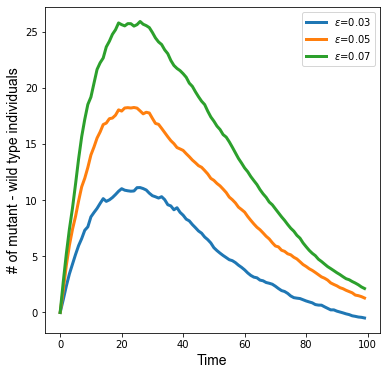

In [261]:
#Calculates the difference in number of survivors between wild type and mutant across the time span
nind = 1000
nrepeats_mut = 1000 #10000

kappa = 0.033
alpha = 0.000222

epsilon = np.array([0.03, 0.05, 0.07])
p_wt = np.array([0.0399, 0.0411, 0.0417])

H1_mut_all = np.zeros((3*nrepeats_mut,Tmax))
H1_wt_all = np.zeros((3*nrepeats_mut,Tmax))

counter1 = 0
counter2 = 0

C = np.arange(0,Tmax,1,dtype = int)
fig1,ax = plt.subplots(figsize=(6,6))

for m in range(3):
    H1_mut = np.zeros((nrepeats_mut,Tmax),dtype = int)
    for k in range(nrepeats_mut):
        counter1 = counter1 + 1
        s = np.ones((Tmax,nind),dtype = int); 
        for j in range(1,Tmax):
            for i in range(nind):
                ran = np.random.rand(1)
                if s[j-1,i] == 1:
                    if ran < (1-epsilon[m])*p_wt[m] + alpha*(((1+kappa)**(j+1))-1):
                        s[j,i] = 0
                if s[j-1,i] == 0:
                    s[j,i] = 0
        H1_mut[k,:] = np.sum(s, axis = 1)
        H1_mut_all[counter1-1,:] = np.sum(s, axis = 1)
    
    H1_wt = np.zeros((nrepeats_mut,Tmax),dtype = int)
    for k in range(nrepeats_mut):
        counter2 = counter2 + 1
        s = np.ones((Tmax,nind),dtype = int); 
        for j in range(1,Tmax):
            for i in range(nind):
                ran = np.random.rand(1)
                if s[j-1,i] == 1:
                    if ran < p_wt[m]:
                        s[j,i] = 0
                if s[j-1,i] == 0:
                    s[j,i] = 0
        H1_wt[k,:] = np.sum(s, axis = 1)
        H1_wt_all[counter2-1,:] = np.sum(s, axis = 1)
    
    #Calculate the difference in number of survivors between wild type and mutant across the time span
    mean_mut = np.mean(H1_mut,axis = 0)
    #std_mut = np.std(H1_mut,axis = 0)
    mean_wt = np.mean(H1_wt,axis = 0)
    #std_wt = np.std(H1_wt,axis = 0)
    diff_mut_wt = mean_mut - mean_wt
    #std_diff_mut = np.std(diff_mut)
    
    if m==0:
        l1, = ax.plot(C,diff_mut_wt,linewidth=3)
    if m==1:
        l2, = ax.plot(C,diff_mut_wt,linewidth=3)
    if m==2:
        l3, = ax.plot(C,diff_mut_wt,linewidth=3)
    
ax.legend((l1,l2,l3),('$\epsilon$=0.03', '$\epsilon$=0.05', '$\epsilon$=0.07'));
afont = {'fontname':'Arial'}
ax.set_xlabel("Time",fontsize = 14,**afont);
ax.set_ylabel("# of mutant - wild type individuals",fontsize = 14,**afont);

x_size = 10
plt.rc('xtick',labelsize=x_size)
y_size = 10
plt.rc('ytick',labelsize=y_size)

#fig.tight_layout()

figure = plt.gcf()
#figure.set_size_inches(3.42, 3.42)
plt.savefig('RA_fig2_Frontinella.pdf', dpi = 600, bbox_inches="tight");

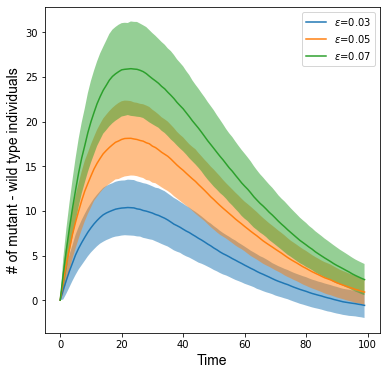

In [255]:
#Calculates the difference in number of survivors between wild type and mutant across the time span 
# - alternative strategy where both mutant and the wildtype uses the same ran value, such that one can 
# calculate a meaningful standard deviation for this difference 
nind = 1000
nrepeats_mut =  1000 #10000

kappa = 0.033
alpha = 0.000222

epsilon = np.array([0.02, 0.03, 0.04])
p_wt = np.array([0.0397, 0.0399, 0.04047])
p_wt_wt = NBNBNBNBNNB

H1_mut_all = np.zeros((3*nrepeats_mut,Tmax))
H1_wt_all = np.zeros((3*nrepeats_mut,Tmax))
diff_mutwt = np.zeros((nrepeats_mut,Tmax))

counter1 = 0
counter2 = 0

C = np.arange(0,Tmax,1,dtype = int)
fig1,ax = plt.subplots(figsize=(6,6))

for m in range(3):
    H1_mut = np.zeros((nrepeats_mut,Tmax),dtype = int)
    H1_wt = np.zeros((nrepeats_mut,Tmax),dtype = int)
    for k in range(nrepeats_mut):
        counter1 = counter1 + 1
        counter2 = counter2 + 1
        s1 = np.ones((Tmax,nind),dtype = int)
        s2 = np.ones((Tmax,nind),dtype = int); 
        for j in range(1,Tmax):
            for i in range(nind):
                ran = np.random.rand(1)
                if s1[j-1,i] == 1:
                    if ran < (1-epsilon[m])*p_wt[m] + alpha*(((1+kappa)**(j+1))-1):
                        s1[j,i] = 0
                if s1[j-1,i] == 0:
                    s1[j,i] = 0
                
                if s2[j-1,i] == 1:
                    if ran < p_wt_wt[m]:
                        s2[j,i] = 0
                if s2[j-1,i] == 0:
                    s2[j,i] = 0
        
        H1_mut[k,:] = np.sum(s1, axis = 1)
        H1_mut_all[counter1-1,:] = np.sum(s1, axis = 1)
    
        H1_wt[k,:] = np.sum(s2, axis = 1)
        H1_wt_all[counter2-1,:] = np.sum(s2, axis = 1)
    
        diff_mutwt[k,:] = H1_mut[k,:] - H1_wt[k,:]
                
    
    #Calculate the difference in number of survivors between wild type and mutant across the time span
    mean_diff = np.mean(diff_mutwt,axis = 0)
    std_diff = np.std(diff_mutwt,axis =0 )
    #mean_mut = np.mean(H1_mut,axis = 0)
    #std_mut = np.std(H1_mut,axis = 0)
    #mean_wt = np.mean(H1_wt,axis = 0)
    #std_wt = np.std(H1_wt,axis = 0)
    #diff_mut_wt = mean_mut - mean_wt
    
    if m==0:
        l1, = ax.plot(C,mean_diff)
        ax.fill_between(range(Tmax), mean_diff-3.0*std_diff/np.sqrt(nrepeats_mut), mean_diff+3.0*std_diff/np.sqrt(nrepeats_mut), alpha = 0.5)
        #ax.fill_between(range(Tmax), mean_diff-1.0*std_diff, mean_diff+1.0*std_diff, alpha = 0.5)
    if m==1:
        l2, = ax.plot(C,mean_diff)
        ax.fill_between(range(Tmax), mean_diff-3.0*std_diff/np.sqrt(nrepeats_mut), mean_diff+3.0*std_diff/np.sqrt(nrepeats_mut), alpha = 0.5)
        #ax.fill_between(range(Tmax), mean_diff-1.0*std_diff, mean_diff+1.0*std_diff, alpha = 0.5)
    if m==2:
        l3, = ax.plot(C,mean_diff)
        ax.fill_between(range(Tmax), mean_diff-3.0*std_diff/np.sqrt(nrepeats_mut), mean_diff+3.0*std_diff/np.sqrt(nrepeats_mut), alpha = 0.5)
        #ax.fill_between(range(Tmax), mean_diff-1.0*std_diff, mean_diff+1.0*std_diff, alpha = 0.5)

ax.legend((l1,l2,l3),('$\epsilon$=0.03', '$\epsilon$=0.05', '$\epsilon$=0.07'));
afont = {'fontname':'Arial'}
ax.set_xlabel("Time",fontsize = 14,**afont);
ax.set_ylabel("# of mutant - wild type individuals",fontsize = 14,**afont);

x_size = 10
plt.rc('xtick',labelsize=x_size)
y_size = 10
plt.rc('ytick',labelsize=y_size)

#fig.tight_layout()

figure = plt.gcf()
#figure.set_size_inches(3.42, 3.42)
plt.savefig('RA_fig2B_Frontinella.pdf', dpi = 600, bbox_inches="tight");

In [257]:
diff_mutwt
#/np.sqrt(nrepeats_mut)

array([[ 0.,  4.,  4., ...,  1.,  1.,  1.],
       [ 0.,  3.,  4., ...,  4.,  4.,  4.],
       [ 0.,  1.,  4., ...,  3.,  3.,  3.],
       ...,
       [ 0.,  5.,  7., ...,  2.,  1.,  1.],
       [ 0.,  0.,  2., ...,  3.,  3.,  3.],
       [ 0.,  0.,  2., ...,  0., -2., -2.]])

In [226]:
np.save('H1_wt_all.npy', H1_wt_all)
np.save('H1_mut_all.npy', H1_mut_all)
# .npy extension is added if not given
#d = np.load('test3.npy')
#a == d

# Figure 4

### r and R0 calculations for wild type and mutant

In [236]:
# Calculate r and R0 ratios between wild type and mutant
# Using H1_mut_all and H1_wt_all calculated in the snippet above with nrepeats_mut = 10000 for three different epsilon values

from scipy.optimize import brentq
#Taken from: https://scipython.com/book/chapter-8-scipy/examples/solving-the-euler-lotka-equation/
# The Euler-Lotka equation: find the one real root in r                                                      
def func(r):
    return np.sum(f * np.exp(-r * x)) - 1

Tmax = 100
nind = 1000
x = np.linspace(1, int(Tmax), 1)
C = np.arange(0,Tmax,1,dtype = int)

# Initializations wild type
nrepeats_wt = 10000                       #10000 for figure
R0_wt_const = np.zeros(3*nrepeats_wt)
r_wt_const = np.zeros(3*nrepeats_wt)

mean_R0_wt_const = np.zeros(3)
std_R0_wt_const = np.zeros(3)
sem_R0_wt_const = np.zeros(3)
mean_r_wt_const = np.zeros(3)
std_r_wt_const = np.zeros(3)
sem_r_wt_const = np.zeros(3)

# Initializations mutant
nrepeats_mut = nrepeats_wt #10000                        #10000 for figure
R0_mut_const = np.zeros(3*nrepeats_mut)
r_mut_const = np.zeros(3*nrepeats_mut)

mean_R0_mut_const = np.zeros(3)
std_R0_mut_const = np.zeros(3)
sem_R0_mut_const = np.zeros(3)
mean_r_mut_const = np.zeros(3)
std_r_mut_const = np.zeros(3)
sem_r_mut_const = np.zeros(3)

#Fecundity functions wild type
#m_wt = np.zeros(Tmax)
#m_wt[35] = 24.0                            #CHECK!
#m_wt[71] = 24.0
#f_wt_const = H1_wt*(1/nind)*m_wt

m_wt_const = np.zeros((3*nrepeats_mut,Tmax))
#m_wt_var = np.zeros((3*nrepeats_mut,Tmax))
fert_wt_const = np.zeros((3,Tmax))
#counter = 0
for z in range(3):
    fert_wt_const[z,35] = 24.0
    fert_wt_const[z,71] = 24.0 
    for s in range(nrepeats_mut):
        #counter = counter + 1
        #m_wt_const[counter-1,:] = fert_wt_const[z,:]
        m_wt_const[s,:] = fert_wt_const[z,:]
f_wt_const = np.multiply(H1_wt_all*(1/nind),m_wt_const)

#fert_wt = np.zeros((Tmax))
#fert_wt = const_fecund + 3.0*const_fecund*C/Tmax
#f_wt_var = (H2_wt/1000.0)*fert_wt #Assuming a time-dependent fecundity for the wild type

# Fecundity functions mutant
m_mut_const = np.zeros((3*nrepeats_mut,Tmax))
#m_mut_var = np.zeros((3*nrepeats_mut,Tmax))
fert_mut_const = np.zeros((3,Tmax))
counter = 0
for z in range(3):
    fert_mut_const[z,35] = 24.0
    fert_mut_const[z,71] = 18.0 #conservative estimates as varying ageing is not included
    for s in range(nrepeats_mut):
        #counter = counter + 1
        #m_mut_const[counter-1,:] = fert_mut_const[z,:]
        m_mut_const[s,:] = fert_mut_const[z,:]
f_mut_const = np.multiply(H1_mut_all*(1/nind),m_mut_const)

#counter = 0
#for z in range(5):
    #for s in range(nrepeats_mut):
        #counter = counter + 1
        #m_mut_var[counter-1,:] = fert_mut_var[z,:]
#f_mut_var = np.multiply(H2_mut_all/1000.0,m_mut_var)

# Calculate mean, std and sem for R0 and r for wild type for both scenarios 
for i in range(3*nrepeats_wt):
    R0_wt_const[i] = np.sum(f_wt_const[i,:])
    #R0_wt_var[j] = np.sum(f_wt_var[j,:])
    
    a, b = -2, 8 
    f = f_wt_const[i,:]
    r = brentq(func, a, b)
    r_wt_const[i] = r
    
#R0_wt_mean_const = np.mean(R0_wt_const)
#R0_wt_std_const = np.std(R0_wt_const)
#R0_wt_sem_const = np.std(R0_wt_const)/math.sqrt(nrepeats_wt)   
#r_wt_mean_const = np.mean(r_wt_const)
#r_wt_std_const = np.std(r_wt_const)
#r_wt_sem_const = np.std(r_wt_const)/math.sqrt(nrepeats_wt)

# Calculate mean, std and sem for R0 and r for every nrepeats chunk for wildtype (for each epsilon value)
for k in range(3):
    mean_R0_wt_const[k] = np.mean(R0_wt_const[k*nrepeats_mut:k*nrepeats_mut+(nrepeats_mut-1)])
    std_R0_wt_const[k] = np.std(R0_wt_const[k*nrepeats_mut:k*nrepeats_mut+(nrepeats_mut-1)])
    sem_R0_wt_const[k] = np.std(R0_wt_const[k*nrepeats_mut:k*nrepeats_mut+(nrepeats_mut-1)])/math.sqrt(nrepeats_mut)
    mean_r_wt_const[k] = np.mean(r_wt_const[k*nrepeats_mut:k*nrepeats_mut+(nrepeats_mut-1)])
    std_r_wt_const[k] = np.std(r_wt_const[k*nrepeats_mut:k*nrepeats_mut+(nrepeats_mut-1)])
    sem_r_wt_const[k] = np.std(r_wt_const[k*nrepeats_mut:k*nrepeats_mut+(nrepeats_mut-1)])/math.sqrt(nrepeats_mut)

# Calculate mean, std and sem for R0 and r for the mutant for both scenarios 
# Calculate R0 and r for all instances
for i in range(3*nrepeats_mut):
    R0_mut_const[i] = np.sum(f_mut_const[i,:])
    
    a, b = -2, 8
    f = f_mut_const[i,:]
    r = brentq(func, a, b)
    r_mut_const[i] = r

# Calculate mean, std and sem for R0 and r for every nrepeats chunk for mutant (for each epsilon value)
for k in range(3):
    mean_R0_mut_const[k] = np.mean(R0_mut_const[k*nrepeats_mut:k*nrepeats_mut+(nrepeats_mut-1)])
    std_R0_mut_const[k] = np.std(R0_mut_const[k*nrepeats_mut:k*nrepeats_mut+(nrepeats_mut-1)])
    sem_R0_mut_const[k] = np.std(R0_mut_const[k*nrepeats_mut:k*nrepeats_mut+(nrepeats_mut-1)])/math.sqrt(nrepeats_mut)
    mean_r_mut_const[k] = np.mean(r_mut_const[k*nrepeats_mut:k*nrepeats_mut+(nrepeats_mut-1)])
    std_r_mut_const[k] = np.std(r_mut_const[k*nrepeats_mut:k*nrepeats_mut+(nrepeats_mut-1)])
    sem_r_mut_const[k] = np.std(r_mut_const[k*nrepeats_mut:k*nrepeats_mut+(nrepeats_mut-1)])/math.sqrt(nrepeats_mut)

    
#Plotting Fig 3
# Choose the position of each barplots on the x-axis (same for 6B)
#y_pos = [0, 2,3,4,5,6, 8,9,10,11,12, 14,15,16,17,18, 20,21,22,23,24] 
y1_pos = [0,2,4]
y2_pos = [1,3,5]
y3_pos = [6,8,10]
y4_pos = [7,9,11]
y5_pos = [2,8]


plt.figure(figsize=(6,6))
#plt.bar(y1_pos,R0_wt_mean,yerr=R0_wt_sem, align='center', alpha=0.5, ecolor='black', capsize=3,color= 0.1, edgecolor='blue');
plt.bar(y1_pos,R0_wt_mean_const,yerr=R0_wt_sem_const, align='center', alpha=0.5, ecolor='black', capsize=3, color = 'C0');
plt.bar(y2_pos,mean_R0_mut_const,yerr=sem_R0_mut_const, align='center', alpha=0.5, ecolor='black', capsize=3, color = 'C2');

plt.ylabel('R0 (expected lifetime reproductive success)',fontsize=14);
#plt.ylim(0.98*R0_wt_mean_const,1.043*R0_wt_mean_const)
plt.ylim(0.98*R0_wt_mean_const[0],1.08*R0_wt_mean_const[0])

plt.twinx()

plt.bar(y3_pos,r_wt_mean_const,yerr=r_wt_sem_const, align='center', alpha=0.5, ecolor='black', capsize=3,color = 'C3');
plt.bar(y4_pos,mean_r_mut_const,yerr=sem_r_mut_const, align='center', alpha=0.5, ecolor='black', capsize=3, color = 'C4');
plt.xticks(y5_pos, ('$R_0$: wild type vs mutant','$r$: wild type vs mutant'));
plt.ylabel('r (intrinsic rate of increase)',fontsize=14);
plt.ylim(0.98*r_wt_mean_const[0],1.05*r_wt_mean_const[0])
#plt.bar(y3_pos,R0_wt_mean_var,yerr=R0_wt_sem_const, align='center', alpha=0.5, ecolor='black', capsize=3,color = 'C3');
#plt.bar(y4_pos,mean_R0_mut_var,yerr=sem_R0_mut_var, align='center', alpha=0.5, ecolor='black', capsize=3, color = 'C3');
#plt.xticks(y5_pos, ('WT $R_0$','Mutant $R_0$','WT $r$','Mutant $r$'));


#ymin, ymax = plt.gca().get_ylim();
#plt.text(0,0.995*ymax,"$\\epsilon$ = {}".format(epsilon));
#plt.text(0,0.992*ymax,"$\\kappa$ = [{},{},{},{},{}]".format(kappa[0],kappa[1],kappa[2],kappa[3],kappa[4]));
#plt.savefig('RA_fig3_Frontinella.pdf', dpi = 600, bbox_inches="tight");

ValueError: f(a) and f(b) must have different signs

In [248]:
#print(m_mut_const[29000,:])
m_mut_const.shape

(30000, 100)

In [250]:
m_mut_const[9990,:]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 24.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0., 18.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [252]:
f_wt_const = np.multiply(H1_wt_all*(1/nind),m_wt_const)
f_wt_const.shape
f_wt_const

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [73]:
H1_wt

array([[1000,  966,  933, ...,   20,   20,   20],
       [1000,  961,  927, ...,   17,   16,   16],
       [1000,  945,  906, ...,   13,   11,   10],
       ...,
       [1000,  949,  907, ...,   17,   17,   17],
       [1000,  963,  928, ...,   18,   18,   18],
       [1000,  960,  920, ...,   12,   12,   12]])

In [74]:
H1_mut_all

array([[1000.,  952.,  918., ...,   17.,   15.,   15.],
       [1000.,  959.,  914., ...,   15.,   15.,   14.],
       [1000.,  960.,  918., ...,   12.,   12.,   12.],
       ...,
       [1000.,  958.,  926., ...,   17.,   17.,   17.],
       [1000.,  959.,  918., ...,   13.,   13.,   12.],
       [1000.,  965.,  923., ...,   20.,   20.,   20.]])

# Figure 5 A & B - negative senescence

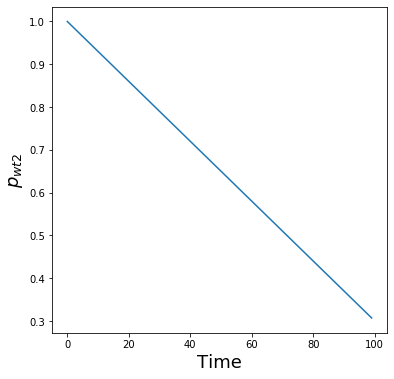

In [49]:
# Assumes a negative linear mortality function that is to multiply with the initial p_wt2

Tmax = 100
y = np.zeros(Tmax)
p_wt2 = 0.05

plt.figure(figsize=(6,6))
x = np.arange(0,Tmax,1,dtype = int)
y = 1.0 - 0.7*x/Tmax
plt.plot(x,y);
plt.xlabel("Time",fontsize=18);
plt.ylabel("$p_{wt2}$",fontsize=18); 

100
1.1695999999999924
100
1.2499999999999896
67
0.030900000000000018


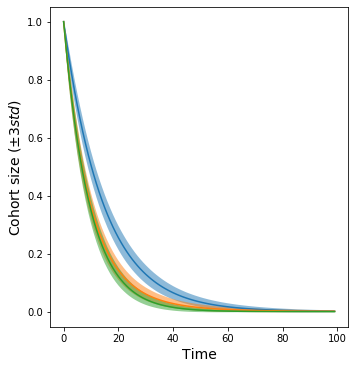

In [95]:
#Plot1: Snippet showing the stochastic simulation of exponential decay as a function of Tmax, cohort size with two different p_wt scenarios
#The simulation is repeated nrepeats times and plus-minus 3 standard deviations is plotted as a shade to give a feeling for the robustness of the cohort
#mortality curve.

p_wt1 = 0.066 #0.05
p_wt2 = 0.1
nind = 1000; 
nrepeats_wt = 10000
Tmax = 100;
C = np.arange(0,Tmax,1,dtype = int)

# With constant p_wt1
H1_wt = np.zeros((nrepeats_wt,Tmax),dtype = int); #idx = np.zeros(nrepeats)
for k in range(0,nrepeats_wt):
    s = np.ones((Tmax,nind),dtype = int); 
    for j in range(1,Tmax):
        for i in range(nind):
            ran = np.random.rand(1)
            if (s[j-1,i] == 1):
                if ran < p_wt1:
                    s[j,i] = 0
            if (s[j-1,i] == 0):
                s[j,i] = 0
    H1_wt[k,:] = np.sum(s, axis = 1)
H1_wt = H1_wt*(1/nind)

# With time-dependent p_wt
H2_wt = np.zeros((nrepeats_wt,Tmax),dtype = int); #idx = np.zeros(nrepeats)
for k in range(0,nrepeats_wt):
    s = np.ones((Tmax,nind),dtype = int); #z = np.zeros((Tmax)); x = np.ones((nind), dtype = int)
    for j in range(1,Tmax):
        for i in range(nind):
            ran = np.random.rand(1)
            if (s[j-1,i] == 1):
                if (ran < p_wt2*y[j]):
                    s[j,i] = 0
            if (s[j-1,i] == 0):
                s[j,i] = 0
    H2_wt[k,:] = np.sum(s, axis = 1)
H2_wt = H2_wt*(1/nind)

# Constant p_wt2
H3_wt = np.zeros((nrepeats_wt,Tmax),dtype = int); #idx = np.zeros(nrepeats)
for k in range(0,nrepeats_wt):
    s = np.ones((Tmax,nind),dtype = int); #z = np.zeros((Tmax)); x = np.ones((nind), dtype = int)
    for j in range(1,Tmax):
        for i in range(nind):
            ran = np.random.rand(1)
            if (s[j-1,i] == 1):
                if (ran < p_wt2):
                    s[j,i] = 0
            if (s[j-1,i] == 0):
                s[j,i] = 0
    H3_wt[k,:] = np.sum(s, axis = 1)
H3_wt = H3_wt*(1/nind)
plt.figure(figsize=(6,6))

mean_wt1 = np.mean(H1_wt,axis = 0)
idx_1 = (np.abs(mean_wt1 - 1/nind)).argmin()
print(idx_1+1)
print(mean_wt1[99]*nind)
plt.plot(C,mean_wt1)
std_H1_wt = np.std(H1_wt,axis = 0)
plt.fill_between(range(Tmax), mean_wt1-3.0*std_H1_wt, mean_wt1+3.0*std_H1_wt, alpha = 0.5)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Cohort size ($\pm 3 std$)", fontsize=14);
#plt.text(0, 20, "$p_{wt}$ = constant", fontsize=14);
#plt.text(95,980, "A", fontsize=18);
    
#plt.subplot(122)
mean_wt2 = np.mean(H2_wt,axis = 0)
idx_2 = (np.abs(mean_wt2 - 1/nind)).argmin()
print(idx_2+1)
print(mean_wt2[99]*nind)
plt.plot(C, mean_wt2);
std_H2_wt = np.std(H2_wt,axis = 0)
plt.fill_between(range(Tmax), mean_wt2-3.0*std_H2_wt, mean_wt2+3.0*std_H2_wt, alpha = 0.5);

mean_wt3 = np.mean(H3_wt,axis = 0)
idx_3 = (np.abs(mean_wt3 - 1/nind)).argmin()
print(idx_3+1)
print(mean_wt3[99]*nind)
plt.plot(C, mean_wt3);
std_H3_wt = np.std(H3_wt,axis = 0)
plt.fill_between(range(Tmax), mean_wt3-3.0*std_H3_wt, mean_wt3+3.0*std_H3_wt, alpha = 0.5);
plt.subplots_adjust(left=0.21,bottom=0.14)
#plt.savefig('RA_fig1.png', dpi = 600)


# Time-dependent mortality rate
### The development of p_mut(t) relative to p_wt(t)- deterministic damage accumulation

In [234]:
#Calculating survivorship curves for captive Frontinella + importing sd data from the figure above
#calculating 10%, 50 % point position
Tmax_cap = 220
Tmax_DT = 100
psi_0 = 1.0  #per time unit damage creation in wild type 
kappa = 0.031

alpha = 0.0000075 
nind = 1000; 
nrepeats_mut = 100

D_mut_d = np.zeros(Tmax_cap); 

#Somatic damage recursion
D_mut_d[0] = psi_0
for j in range(1,Tmax_cap):
    psi_mut = psi_0 + kappa*D_mut_d[j-1]
    D_mut_d[j] = psi_mut + D_mut_d[j-1]


H2_mut = np.zeros((nrepeats_mut,Tmax_cap),dtype = int)
for k in range(nrepeats_mut):
    s = np.ones((Tmax_cap,nind),dtype = int); 
    for j in range(1,Tmax_cap):
        for i in range(nind):
            ran = np.random.rand(1)
            if s[j-1,i] == 1:
                if ran < alpha*D_mut_d[j]:
                    s[j,i] = 0
            if s[j-1,i] == 0:
                s[j,i] = 0
    H2_mut[k,:] = np.sum(s, axis = 1)

mean_mut_var = np.mean(H2_mut,axis = 0)
idx_900 = (np.abs(mean_mut - 900)).argmin()
idx_500 = (np.abs(mean_mut - 500)).argmin()
idx_1 = (np.abs(mean_mut - 1)).argmin()
print(idx_1)
frac_90 = idx_900/idx_1
frac_50 = idx_500/idx_1



99


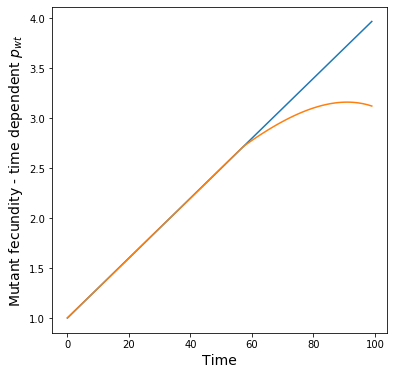

In [160]:
# Calculates fertility curves as a function of somatic damage. Fertility increases with age.
# deterministic D_mut

epsilon = 0.02
alpha = 0.0000075 
Tmax_DT = 100; 
counter = 0
mu = 50.0

C = np.arange(0,Tmax_DT,1,dtype = int)

fert_wt = np.zeros(Tmax_DT)
#const_fecund = 0.1 #0.1 #0.051
fert_wt = 1 + 3.0*C/100
plt.figure(figsize=(6,6))
plt.plot(C,fert_wt);
plt.xlabel("Time",fontsize = 14)
plt.ylabel("Fecundity",fontsize=14);

mut_dam = np.zeros((Tmax_DT))
fert_m_var = np.ones((Tmax_DT))
counter = counter + 1
f_wt = const_fecund + 3.0*const_fecund*C/100
for j in range(0,Tmax_DT):  
        mut_dam[j] = (1-epsilon)*p_wt2*y[j] + alpha*D_mut_d[j]
        #mut_dam[j] = alpha*D_mut_d[j]
        if mut_dam[j]> p_wt2*y[j]:
            fert_m_var[j] = 1.0-mu*(mut_dam[j]-p_wt2*y[j])
            if fert_m_var[j] <= 0.0:
                fert_m_var[j] = 0.0
        fert_m_var[j] = fert_wt[j]*fert_m_var[j]

plt.plot(C,fert_m_var)

#plt.legend((l1,l2,l3,l4,l5),('$\kappa$=0.02', '$\kappa$=0.025', '$\kappa$=0.03', '$\kappa$=0.04', '$\kappa$=0.05'))
plt.xlabel("Time",fontsize = 14)
plt.ylabel("Mutant fecundity - time dependent $p_{wt}$",fontsize=14);
#plt.savefig('RA_fig5B.png', dpi = 600);

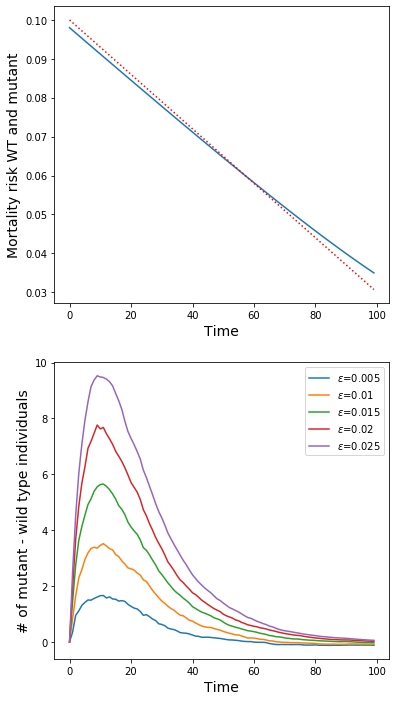

In [97]:
### Calculates the mutant mortality risk coefficient relative to the wild type coefficient across the time span - H2 data - deterministic D_mut

epsilon = [0.005, 0.01, 0.015, 0.02, 0.025]
alpha = 0.0000075
Tmax_DT = 100

C = np.arange(0,Tmax_DT,1,dtype = int)

#plt.figure(figsize=(6,6))
plt.subplots(2,1,figsize=(6,12))
plt.subplot(211)
mut_dam = np.zeros((5,Tmax_DT))
for m in range(3,4):
    for j in range(0,Tmax_DT):  
            mut_dam[m,j] = (1-epsilon[m])*p_wt2*y[j] + alpha*D_mut_d[j]
    #idx = (np.abs(mut_dam[m,1:99] - p_wt1)).argmin() 
    #print("p_mut crosses p_wt at T =  %.2f" % (idx+1))                       
    if m==0:
        l1, = plt.plot(C,mut_dam[0,:])
    if m==1:
        l2, = plt.plot(C,mut_dam[1,:])
    if m==2:
        l3, = plt.plot(C,mut_dam[2,:])
    if m==3:
        l4, = plt.plot(C,mut_dam[3,:])
    if m==4:
        l5, = plt.plot(C,mut_dam[4,:])
plt.plot(C,p_wt2*y[0:Tmax],'r:')
#plt.legend((l1,l2,l3,l4,l5),('$\epsilon$=0.005', '$\epsilon$=0.01', '$\epsilon$=0.015', '$\epsilon$=0.02', '$\epsilon$=0.025'))
plt.xlabel("Time",fontsize = 14)
plt.ylabel("Mortality risk WT and mutant",fontsize=14);
#plt.plot([0,Tmax],[p_wt1,p_wt1],'k-');
#plt.plot([0,Tmax],[(1-epsilon[0])*p_wt2,(1-epsilon[0])*p_wt2],'C0--');
#plt.plot([0,Tmax],[(1-epsilon[1])*p_wt2,(1-epsilon[1])*p_wt2],'C1--');
#plt.plot([0,Tmax],[(1-epsilon[2])*p_wt2,(1-epsilon[2])*p_wt2],'C2--');
#plt.plot([0,Tmax],[(1-epsilon[3])*p_wt2,(1-epsilon[3])*p_wt2],'C3--');
#plt.plot([0,Tmax],[(1-epsilon[4])*p_wt2,(1-epsilon[4])*p_wt2],'C4--');
#plt.ylim((1-epsilon[3])*p_wt1-0.001,p_wt1+0.003)
#ymin, ymax = plt.gca().get_ylim()


#Calculates the difference in number of survivors between wild type and mutant across the time span - H1 data - deterministic D_mut

epsilon = [0.005, 0.01, 0.015, 0.02, 0.025]
alpha = 0.0000075
nind = 1000; 
Tmax_DT = 100; 
nrepeats_mut = 10000
counter1 = 0

H2_mut_all = np.zeros((5*nrepeats_mut,Tmax_DT))

C = np.arange(0,Tmax_DT,1,dtype = int)

#plt.figure(figsize=(6,6))
plt.subplot(212)
for m in range(5):
    H2_mut = np.zeros((nrepeats_mut,Tmax_DT),dtype = int)
    for k in range(nrepeats_mut):
        counter1 = counter1 + 1
        s = np.ones((Tmax_DT,nind),dtype = int); 
        for j in range(1,Tmax_DT):
            for i in range(nind):
                ran = np.random.rand(1)
                if s[j-1,i] == 1:
                    if ran < (1-epsilon[m])*p_wt2*y[j] + alpha*D_mut_d[j]:
                        s[j,i] = 0
                if s[j-1,i] == 0:
                    s[j,i] = 0
        H2_mut[k,:] = np.sum(s, axis = 1)
        H2_mut_all[counter1-1,:] = np.sum(s, axis = 1)

    #Calculate the difference in number of survivors between wild type and mutant across the time span - H1 data
    mean_mut = np.mean(H2_mut,axis = 0)
    #mean_wt1 = np.mean(H1_wt,axis = 0)
    diff_mut_wt = mean_mut - mean_wt2*nind
    if m==0:
        l1, = plt.plot(C,diff_mut_wt)
    if m==1:
        l2, = plt.plot(C,diff_mut_wt)
    if m==2:
        l3, = plt.plot(C,diff_mut_wt)
    if m==3:
        l4, = plt.plot(C,diff_mut_wt)
    if m==4:
        l5, = plt.plot(C,diff_mut_wt)
plt.legend((l1,l2,l3,l4,l5),('$\epsilon$=0.005', '$\epsilon$=0.01', '$\epsilon$=0.015', '$\epsilon$=0.02', '$\epsilon$=0.025'))
plt.xlabel("Time",fontsize = 14)
plt.ylabel("# of mutant - wild type individuals",fontsize=14);
#plt.plot([0,Tmax],[0,0],'r--');
#plt.savefig('RA_fig3.png', dpi = 600);

In [96]:
np.size(H2_mut)

10000

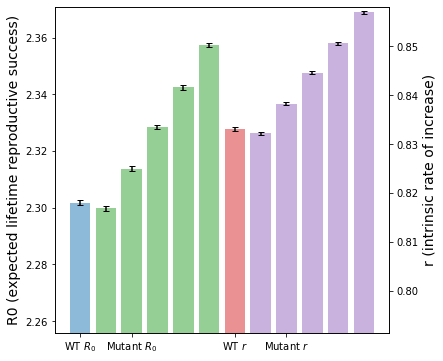

In [198]:
# Calculate r and R0 ratios between wild type and mutant - using H1 and H2 data 

from scipy.optimize import brentq
#Taken from: https://scipython.com/book/chapter-8-scipy/examples/solving-the-euler-lotka-equation/
# The Euler-Lotka equation: find the one real root in r                                                      
def func(r):
    return np.sum(f * np.exp(-r * x)) - 1

Tmax = 100
x = np.linspace(1, int(Tmax), 1)
C = np.arange(0,Tmax,1,dtype = int)

# Initializations wild type
nrepeats_wt = 10000                       #10000 for figure
#R0_wt_const = np.zeros(nrepeats_wt)
R0_wt_var = np.zeros(nrepeats_wt)
#r_wt_const = np.zeros(nrepeats_wt)
r_wt_var = np.zeros(nrepeats_wt)

# Initializations mutant
nrepeats_mut = 10000                        #10000 for figure
R0_mut_var = np.zeros(5*nrepeats_mut)
r_mut_var = np.zeros(5*nrepeats_mut)

mean_R0_mut_var = np.zeros(5)
std_R0_mut_var = np.zeros(5)
sem_R0_mut_var = np.zeros(5)
mean_r_mut_var = np.zeros(5)
std_r_mut_var = np.zeros(5)
sem_r_mut_var = np.zeros(5)

#Fecundity functions wild type
num_females = np.zeros(Tmax)
for k in range(0,Tmax,8):
    num_females[k] = 1
    
fert_wt_var = np.zeros(Tmax)
fert_wt_var = 1 + 3.0*C/100
f_wt_var = H2_wt*fert_wt_var*num_females #Assuming a time-dependent fecundity for the wild type

# Calculate mean, std and sem for R0 and r for wild type for both scenarios 
for j in range(nrepeats_wt):
    R0_wt_var[j] = np.sum(f_wt_var[j,:])

    a, b = -2, 8 
    f = f_wt_var[j,:]
    r = brentq(func, a, b)
    r_wt_var[j] = r
    
R0_wt_mean_var = np.mean(R0_wt_var)
R0_wt_std_var = np.std(R0_wt_var)
R0_wt_sem_var = np.std(R0_wt_var)/math.sqrt(nrepeats_wt)   
r_wt_mean_var = np.mean(r_wt_var)
r_wt_std_var = np.std(r_wt_var)
r_wt_sem_var = np.std(r_wt_var)/math.sqrt(nrepeats_wt)
   

# Fecundity functions mutant
epsilon = [0.005, 0.01, 0.015, 0.02, 0.025]
alpha = 0.0000075
mu = 50
mut_dam = np.zeros(Tmax)
fert_mut_var = np.ones((5,Tmax))
m_mut_var = np.zeros((5*nrepeats_mut,Tmax))
counter = 0
for z in range(5):
    for j in range(Tmax):  
        mut_dam[j] = (1-epsilon[z])*p_wt2*y[j] + alpha*D_mut_d[j]
        if mut_dam[j]> p_wt2*y[j]:
            fert_mut_var[z,j] = 1.0-mu*(mut_dam[j]-p_wt2*y[j])
            if fert_mut_var[z,j] <= 0.0:
                fert_mut_var[z,j] = 0.0
    fert_mut_var[z,:] = fert_wt_var*fert_mut_var[z,:]
    for s in range(nrepeats_mut):
        counter = counter + 1
        #fert_mut_var_incl = fert_mut_var*num_females
        m_mut_var[counter-1,:] = fert_mut_var[z,:]*num_females
H2_mut_norm = H2_mut_all*(1/nind)
f_mut_var = np.multiply(H2_mut_norm,m_mut_var)   


# Calculate mean, std and sem for R0 and r for the mutant for both scenarios 
# Calculate R0 and r for all instances
for i in range(5*nrepeats_mut):
    R0_mut_var[i] = np.sum(f_mut_var[i,:])
    
    a, b = -2, 8
    f = f_mut_var[i,:]
    r = brentq(func, a, b)
    r_mut_var[i] = r

# Calculate mean, std and sem for R0 and r for every nrepeats chunk for mutant (for each epsilon value)
for k in range(5):
    mean_R0_mut_var[k] = np.mean(R0_mut_var[k*nrepeats_mut:k*nrepeats_mut+(nrepeats_mut-1)])
    std_R0_mut_var[k] = np.std(R0_mut_var[k*nrepeats_mut:k*nrepeats_mut+(nrepeats_mut-1)])
    sem_R0_mut_var[k] = np.std(R0_mut_var[k*nrepeats_mut:k*nrepeats_mut+(nrepeats_mut-1)])/math.sqrt(nrepeats_mut)
    mean_r_mut_var[k] = np.mean(r_mut_var[k*nrepeats_mut:k*nrepeats_mut+(nrepeats_mut-1)])
    std_r_mut_var[k] = np.std(r_mut_var[k*nrepeats_mut:k*nrepeats_mut+(nrepeats_mut-1)])
    sem_r_mut_var[k] = np.std(r_mut_var[k*nrepeats_mut:k*nrepeats_mut+(nrepeats_mut-1)])/math.sqrt(nrepeats_mut)

#Plotting Fig 5B
plt.figure(figsize=(6,6))
# Choose the position of each barplots on the x-axis (same for 6B)
#y_pos = [0, 2,3,4,5,6, 8,9,10,11,12, 14,15,16,17,18, 20,21,22,23,24] 
y1_pos = [0]
#y2_pos = [2,3,4,5,6, 8,9,10,11,12]
y2_pos = [1,2,3,4,5]
#y2_pos = [2,3,4,5,6]
y3_pos = [6]
y4_pos = [7,8,9,10,11]
y5_pos = [0,3,6,9]

#plt.figure(figsize=(6,6))
#plt.bar(y1_pos,R0_wt_mean,yerr=R0_wt_sem, align='center', alpha=0.5, ecolor='black', capsize=3,color= 0.1, edgecolor='blue');
plt.bar(y1_pos,R0_wt_mean_var,yerr=R0_wt_sem_var, align='center', alpha=0.5, ecolor='black', capsize=3, color = 'C0');
plt.bar(y2_pos,mean_R0_mut_var,yerr=sem_R0_mut_var, align='center', alpha=0.5, ecolor='black', capsize=3, color = 'C2');
plt.ylabel('R0 (expected lifetime reproductive success)',fontsize=14);
plt.ylim(0.98*R0_wt_mean_var,1.03*R0_wt_mean_var)
plt.twinx()
plt.bar(y3_pos,r_wt_mean_var,yerr=r_wt_sem_var, align='center', alpha=0.5, ecolor='black', capsize=3,color = 'C3');
plt.bar(y4_pos,mean_r_mut_var,yerr=sem_r_mut_var, align='center', alpha=0.5, ecolor='black', capsize=3, color = 'C4');
plt.ylabel('r (intrinsic rate of increase)',fontsize=14);
plt.ylim(0.95*r_wt_mean_var,1.03*r_wt_mean_var)
#plt.bar(y3_pos,R0_wt_mean_var,yerr=R0_wt_sem_const, align='center', alpha=0.5, ecolor='black', capsize=3,color = 'C3');
#plt.bar(y4_pos,mean_R0_mut_var,yerr=sem_R0_mut_var, align='center', alpha=0.5, ecolor='black', capsize=3, color = 'C3');
plt.xticks(y5_pos, ('WT $R_0$','Mutant $R_0$','WT $r$','Mutant $r$'));

#ymin, ymax = plt.gca().get_ylim();
#plt.text(0,0.995*ymax,"$\\epsilon$ = {}".format(epsilon));
#plt.text(0,0.992*ymax,"$\\kappa$ = [{},{},{},{},{}]".format(kappa[0],kappa[1],kappa[2],kappa[3],kappa[4])); 


In [201]:
(0.86-0.835)*100/0.835

2.994011976047907

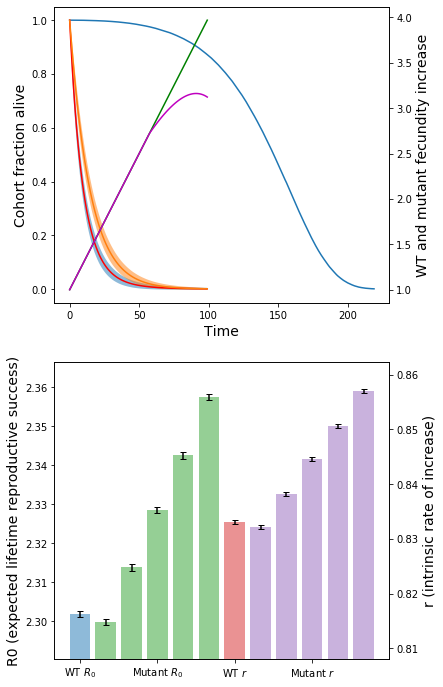

In [247]:
#Plotting Fig 5A

plt.subplots(2,1,figsize=(6,12))
plt.subplot(211)
#plt.figure(figsize=(6,6))
C = np.arange(0,Tmax_cap,1,dtype = int) 
plt.plot(C,mean_mut_var*(1/nind))
#plt.tight_layout()

C1 = np.arange(0,Tmax_DT,1,dtype = int)
mean_wt2_ND = mean_wt2
#mean_mut_wild = mean_mut_DT*(1/nind)
#plt.plot(C1,mean_wt1)
plt.plot(C1,mean_wt2_ND, 'r-')
std_H2_wt = np.std(H2_wt,axis = 0)
plt.fill_between(range(Tmax_DT), mean_wt2_ND-3.0*std_H2_wt, mean_wt2_ND+3.0*std_H2_wt, alpha = 0.5)
H1_wt_ND = H1_wt*(1/nind)
mean_wt1_ND = np.mean(H1_wt_ND,axis = 0)
std_H1_wt_ND = np.std(H1_wt_ND, axis = 0)
plt.plot(C1,mean_wt1_ND)
plt.fill_between(range(Tmax), mean_wt1_ND-3.0*std_H1_wt_ND, mean_wt1_ND+3.0*std_H1_wt_ND, alpha = 0.5)
plt.xlabel("Time",fontsize = 14)
plt.ylabel("Cohort fraction alive",fontsize=14);

plt.twinx()
plt.plot(C1,fert_wt,'g');
plt.plot(C1,fert_m_var,'m');
plt.ylabel("WT and mutant fecundity increase",fontsize=14);

plt.subplot(212)
#Plotting Fig 5B
# Choose the position of each barplots on the x-axis (same for 6B)
#y_pos = [0, 2,3,4,5,6, 8,9,10,11,12, 14,15,16,17,18, 20,21,22,23,24] 
y1_pos = [0]
#y2_pos = [2,3,4,5,6, 8,9,10,11,12]
y2_pos = [1,2,3,4,5]
#y2_pos = [2,3,4,5,6]
y3_pos = [6]
y4_pos = [7,8,9,10,11]
y5_pos = [0,3,6,9]

#plt.figure(figsize=(6,6))
#plt.bar(y1_pos,R0_wt_mean,yerr=R0_wt_sem, align='center', alpha=0.5, ecolor='black', capsize=3,color= 0.1, edgecolor='blue');
plt.bar(y1_pos,R0_wt_mean_var,yerr=R0_wt_sem_var, align='center', alpha=0.5, ecolor='black', capsize=3, color = 'C0');
plt.bar(y2_pos,mean_R0_mut_var,yerr=sem_R0_mut_var, align='center', alpha=0.5, ecolor='black', capsize=3, color = 'C2');
plt.ylabel('R0 (expected lifetime reproductive success)',fontsize=14);
plt.ylim(0.995*R0_wt_mean_var,1.028*R0_wt_mean_var)
plt.twinx()
plt.bar(y3_pos,r_wt_mean_var,yerr=r_wt_sem_var, align='center', alpha=0.5, ecolor='black', capsize=3,color = 'C3');
plt.bar(y4_pos,mean_r_mut_var,yerr=sem_r_mut_var, align='center', alpha=0.5, ecolor='black', capsize=3, color = 'C4');
plt.ylabel('r (intrinsic rate of increase)',fontsize=14);
plt.ylim(0.97*r_wt_mean_var,1.035*r_wt_mean_var)
#plt.bar(y3_pos,R0_wt_mean_var,yerr=R0_wt_sem_const, align='center', alpha=0.5, ecolor='black', capsize=3,color = 'C3');
#plt.bar(y4_pos,mean_R0_mut_var,yerr=sem_R0_mut_var, align='center', alpha=0.5, ecolor='black', capsize=3, color = 'C3');
plt.xticks(y5_pos, ('WT $R_0$','Mutant $R_0$','WT $r$','Mutant $r$'));

plt.savefig('RA_fig5.png', dpi = 600);

In [241]:
H1_wt

array([[1000,  932,  867, ...,    0,    0,    0],
       [1000,  940,  873, ...,    2,    2,    2],
       [1000,  939,  881, ...,    1,    1,    1],
       ...,
       [1000,  934,  867, ...,    1,    1,    1],
       [1000,  943,  878, ...,    1,    1,    1],
       [1000,  934,  887, ...,    0,    0,    0]])

In [153]:
np.size(mean_mut)

100

In [ ]:
#Calculates the mutant mortality risk coefficient relative to the wild type coefficient across the time span - H2 data - deterministic D_mut
#varies alpha(4) and kappa(5) values

#p_wt = 0.066
#rescale = 1.88
epsilon = 0.02
Tmax = 100

C = np.arange(0,Tmax,1,dtype = int)

fig = plt.subplots(2,2,figsize=(15,10))

for u in range(4):
    if u == 0:
        alpha = 0.000005
        plt.subplot(221)
    if u == 1:
        alpha = 0.00001
        plt.subplot(222) 
    if u == 2:
        alpha = 0.000015 
        plt.subplot(223)
    if u == 3:
        alpha = 0.00002
        plt.subplot(224)
    print()
    mut_dam = np.zeros((5,Tmax))
    for m in range(5):
        for j in range(0,Tmax):  
                mut_dam[m,j] = (1-epsilon)*p_wt2*y[j] + alpha*D_mut_d[m,j]
        test = np.subtract(mut_dam[m,1:Tmax-1], p_wt2*y[1:Tmax-1])
        test = np.abs(test)
        #idx = np.abs(mut_dam[m,1:Tmax-1] - p_wt*y[3,1:Tmax-1]).argmin() 
        #idx = np.subtract(mut_dam[m,:Tmax-1],p_wt*y[3,10:Tmax-1]).argmin()
        idx = np.argmin(test)
        print("p_mut crosses p_wt at T =  %.2f" % (idx+1))                       
        if m==0:
            l1, = plt.plot(C,mut_dam[0,:])
        if m==1:
            l2, = plt.plot(C,mut_dam[1,:])
        if m==2:
            l3, = plt.plot(C,mut_dam[2,:])
        if m==3:
            l4, = plt.plot(C,mut_dam[3,:])
        if m==4:
            l5, = plt.plot(C,mut_dam[4,:])
        plt.plot(C,p_wt2*y[0:Tmax],'r:')
    plt.legend((l1,l2,l3,l4,l5),('$\kappa$=0.02', '$\kappa$=0.03', '$\kappa$=0.04', '$\kappa$=0.05', '$\kappa$=0.06'))
    plt.xlabel("Time",fontsize = 16)
    plt.ylabel("$p_{mut}$",fontsize=18);
    plt.plot([0,Tmax],[p_wt2,p_wt2],'r--');
    #plt.plot([0,Tmax],[(1-epsilon)*p_wt,(1-epsilon)*p_wt],'b--');
    #plt.ylim((1-epsilon)*p_wt-0.002,p_wt+0.005)
    #ymin, ymax = plt.gca().get_ylim()
    #plt.text(0,0.0635, "$\\epsilon$ = {}, $\\alpha$ = {}".format(epsilon,alpha))

### Introduce reduced fecundity as a function of damage - time-varying p_wt

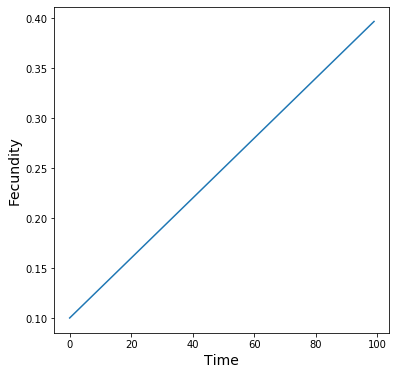

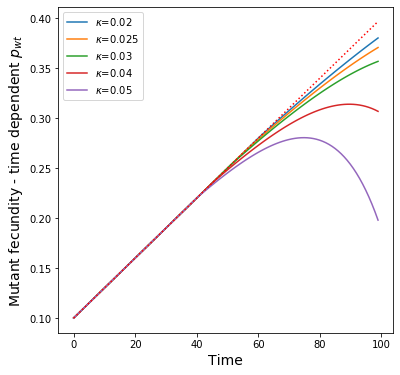

In [189]:
# Calculates fertility curves as a function of somatic damage. Fertility increases with age.
# deterministic D_mut

epsilon = 0.02
alpha = 0.00001  #0.000005
Tmax = 100; 
counter = 0
mu = 20.0

C = np.arange(0,Tmax,1,dtype = int)

fert_wt = np.zeros((Tmax))
const_fecund = 0.1 #0.1 #0.051
fert_wt = const_fecund + 3.0*const_fecund*C/100
plt.figure(figsize=(6,6))
plt.plot(C,fert_wt);
plt.xlabel("Time",fontsize = 14)
plt.ylabel("Fecundity",fontsize=14);


plt.figure(figsize=(6,6))

mut_dam = np.zeros((5,Tmax))
fert_mut_var = np.ones((5,Tmax))
for m in range(5):
    counter = counter + 1
    f_wt = const_fecund + 3.0*const_fecund*C/100
    for j in range(0,Tmax):  
            mut_dam[m,j] = (1-epsilon)*p_wt2*y[j] + alpha*D_mut_d[m,j]
            if mut_dam[m,j]> p_wt2*y[j]:
                fert_mut_var[m,j] = 1.0-mu*(mut_dam[m,j]-p_wt2*y[j])
                if fert_mut_var[m,j] <= 0.0:
                    fert_mut_var[m,j] = 0.0
            fert_mut_var[m,j] = fert_wt[j]*fert_mut_var[m,j]
    
    if m==0:
        l1, = plt.plot(C,fert_mut_var[0,:])
    if m==1:
        l2, = plt.plot(C,fert_mut_var[1,:])
    if m==2:
        l3, = plt.plot(C,fert_mut_var[2,:])
    if m==3:
        l4, = plt.plot(C,fert_mut_var[3,:])
    if m==4:
        l5, = plt.plot(C,fert_mut_var[4,:])
plt.plot(C,fert_wt,'r:')
plt.legend((l1,l2,l3,l4,l5),('$\kappa$=0.02', '$\kappa$=0.025', '$\kappa$=0.03', '$\kappa$=0.04', '$\kappa$=0.05'))
plt.xlabel("Time",fontsize = 14)
plt.ylabel("Mutant fecundity - time dependent $p_{wt}$",fontsize=14);
plt.savefig('RA_fig5B.png', dpi = 600);

In [ ]:
# Calculates fertility curves as a function of somatic damage. 
# deterministic D_mut

epsilon = 0.02
#alpha = 0.000005
Tmax = 100; 
counter = 0
mu = 50.0
const_fecund = 0.1

C = np.arange(0,Tmax,1,dtype = int)

plt.figure(figsize=(6,6))

mut_dam = np.zeros((5,Tmax))
fert_mut_const = np.ones((5,Tmax))
for m in range(5):
    for j in range(0,Tmax):  
            mut_dam[m,j] = (1-epsilon)*p_wt1*y[j] + alpha*D_mut_d[m,j]
            #caluclates the fertility decline
            if mut_dam[m,j]<= p_wt1*y[j]:
                fert_mut_const[m,j] = const_fecund
            if mut_dam[m,j]> p_wt1*y[j]:
                fert_mut_const[m,j] = const_fecund*(1.0-mu*(mut_dam[m,j]-p_wt1*y[j]))
                if fert_mut_const[m,j] <= 0.0:
                    fert_mut_const[m,j] = 0.0
    
    if m==0:
        l1, = plt.plot(C,fert_mut_const[0,:])
    if m==1:
        l2, = plt.plot(C,fert_mut_const[1,:])
    if m==2:
        l3, = plt.plot(C,fert_mut_const[2,:])
    if m==3:
        l4, = plt.plot(C,fert_mut_const[3,:])
    if m==4:
        l5, = plt.plot(C,fert_mut_const[4,:])
plt.legend((l1,l2,l3,l4,l5),('$\kappa$=0.02', '$\kappa$=0.025', '$\kappa$=0.03', '$\kappa$=0.04', '$\kappa$=0.05'))
plt.xlabel("Time",fontsize = 14)
plt.ylabel("Mutant fecundity - constant $p_{wt}$",fontsize=14);
plt.savefig('RA_fig5A.png', dpi = 600);

### Introduce reduced fecundity as a function of damage


p_mut crosses p_wt at T =  62.00
p_mut crosses p_wt at T =  53.00
p_mut crosses p_wt at T =  46.00
p_mut crosses p_wt at T =  41.00
p_mut crosses p_wt at T =  38.00

p_mut crosses p_wt at T =  43.00
p_mut crosses p_wt at T =  38.00
p_mut crosses p_wt at T =  34.00
p_mut crosses p_wt at T =  31.00
p_mut crosses p_wt at T =  28.00

p_mut crosses p_wt at T =  33.00
p_mut crosses p_wt at T =  30.00
p_mut crosses p_wt at T =  27.00
p_mut crosses p_wt at T =  25.00
p_mut crosses p_wt at T =  23.00

p_mut crosses p_wt at T =  27.00
p_mut crosses p_wt at T =  25.00
p_mut crosses p_wt at T =  23.00
p_mut crosses p_wt at T =  21.00
p_mut crosses p_wt at T =  20.00


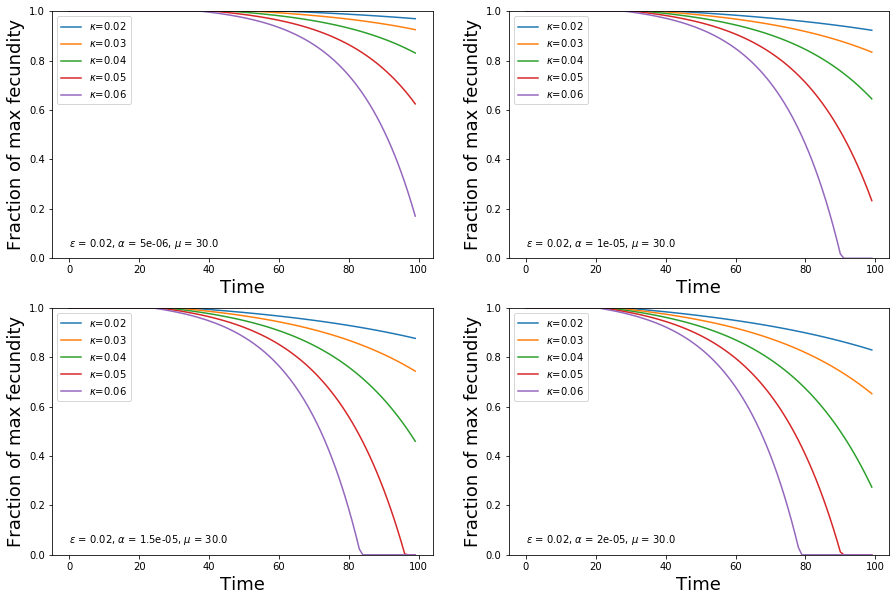

In [15]:
# Calculates fertility curves as a function of somatic damage. Uses a slight revision of the scripts above. 
# deterministic D_mut
# varies alpha(4) and kappa(5) values

epsilon = 0.02
Tmax = 100; 
counter = 0
mu = 30.0

frac_fert = np.zeros((20,Tmax))

C = np.arange(0,Tmax,1,dtype = int)

fig = plt.subplots(2,2,figsize=(15,10))

for u in range(4):
    if u == 0:
        alpha = 0.000005
        plt.subplot(221)
    if u == 1:
        alpha = 0.00001
        plt.subplot(222) 
    if u == 2:
        alpha = 0.000015 
        plt.subplot(223)
    if u == 3:
        alpha = 0.00002
        plt.subplot(224)
    print()
    mut_dam = np.zeros((5,Tmax))
    fert_mut = np.ones((5,Tmax))
    for m in range(5):
        counter = counter + 1
        for j in range(0,Tmax):  
                mut_dam[m,j] = (1-epsilon)*p_wt1*y[j] + alpha*D_mut_d[m,j]
                #caluclates the fertility decline
                if mut_dam[m,j]> p_wt1*y[j]:
                    fert_mut[m,j] = 1.0-mu*(mut_dam[m,j]-p_wt1*y[j])
                    if fert_mut[m,j] <= 0.0:
                        fert_mut[m,j] = 0.0
        idx = (np.abs(mut_dam[m,1:Tmax-1] - p_wt1*y[1:Tmax-1])).argmin() 
        print("p_mut crosses p_wt at T =  %.2f" % (idx+1))
        frac_fert[counter-1,:] = fert_mut[m,:]
        if m==0:
            l1, = plt.plot(C,fert_mut[0,:])
        if m==1:
            l2, = plt.plot(C,fert_mut[1,:])
        if m==2:
            l3, = plt.plot(C,fert_mut[2,:])
        if m==3:
            l4, = plt.plot(C,fert_mut[3,:])
        if m==4:
            l5, = plt.plot(C,fert_mut[4,:])
    plt.legend((l1,l2,l3,l4,l5),('$\kappa$=0.02', '$\kappa$=0.03', '$\kappa$=0.04', '$\kappa$=0.05', '$\kappa$=0.06'))
    plt.xlabel("Time",fontsize = 18)
    plt.ylabel("Fraction of max fecundity",fontsize=18);
    #plt.plot([0,Tmax],[p_wt,p_wt],'r--');
    #plt.plot([0,Tmax],[(1-epsilon)*p_wt,(1-epsilon)*p_wt],'b--');
    plt.ylim(0,1.0)
    #ymin, ymax = plt.gca().get_ylim()
    plt.text(0,0.0475, "$\\epsilon$ = {}, $\\alpha$ = {}, $\\mu$ = {}".format(epsilon,alpha,mu))

### R0 and r - damage-dependent fecundity

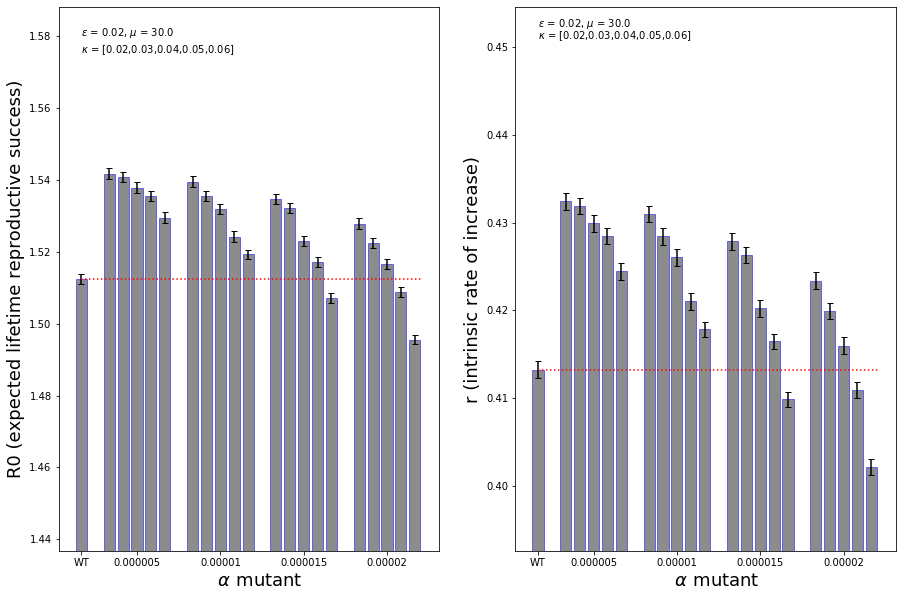

In [16]:
# Calculate r and R0 ratios between wild type and mutant - using H1 data and fertiliy graphs above
from scipy.optimize import brentq
#Taken from: https://scipython.com/book/chapter-8-scipy/examples/solving-the-euler-lotka-equation/

#m(k) = the mean number of live females born per time period per female alive during the k period.
#m = const_fecund*np.ones(Tmax)
nrepeats_wt = 1000
nrepeats_mut = 1000
R0_mut = np.zeros(20*nrepeats_wt)
r_mut = np.zeros(20*nrepeats_wt)

m_mut = np.zeros((20*nrepeats_mut,Tmax))
#f_mut = np.zeros((20*nrepeats_mut,Tmax))

mean_R0_mut = np.zeros(20)
std_R0_mut = np.zeros(20)
mean_r_mut = np.zeros(20)
std_r_mut = np.zeros(20)
sem_R0_mut = np.zeros(20)
sem_r_mut = np.zeros(20)


r_wt = np.zeros(nrepeats_wt)
R0_wt = np.zeros(nrepeats_wt)

const_fecund = 0.1 #0.1 #0.051
m_wt = const_fecund*np.ones(Tmax)
#m_mut = const_fecund*m1
    
f_wt = (H1_wt/1000.0)*m_wt
f_mut = (H1_mut_all/1000.0)*m_mut

x = np.linspace(1, int(Tmax), 1)

#Calculation for wild type 
# The Euler-Lotka equation: find the one real root in r                                                      
def func(r):
    return np.sum(f * np.exp(-r * x)) - 1

#wild type 
for j in range(nrepeats_wt):
    R0_wt[j] = np.sum(f_wt[j,:])

    a, b = -2, 8 
    f = f_wt[j,:]
    r = brentq(func, a, b)
    r_wt[j] = r

# Calculate mean and std for R0 and r for wild type  
R0_wt_mean = np.mean(R0_wt)
R0_wt_std = np.std(R0_wt)
R0_wt_sem = np.std(R0_wt)/math.sqrt(nrepeats_wt)   
r_wt_mean = np.mean(r_wt)
r_wt_std = np.std(r_wt)
r_wt_sem = np.std(r_wt)/math.sqrt(nrepeats_wt)

counter = 0
for z in range(20):
    for s in range(nrepeats_mut):
        counter = counter + 1
        m_mut[counter-1,:] = const_fecund*frac_fert[z,:]

f_mut = np.multiply(H1_mut_all/1000.0,m_mut)

# Calculate mean and std for R0 and r for mutant   
for i in range(20*nrepeats_mut):
    R0_mut[i] = np.sum(f_mut[i,:])

    a, b = -2, 8
    f = f_mut[i,:]
    r = brentq(func, a, b)
    r_mut[i] = r

# Calculate mean and std for R0 and r for every nrepeats chunk for mutant
for k in range(20):
    mean_R0_mut[k] = np.mean(R0_mut[k*nrepeats_mut:k*nrepeats_mut+(nrepeats_mut-1)])
    std_R0_mut[k] = np.std(R0_mut[k*nrepeats_mut:k*nrepeats_mut+(nrepeats_mut-1)])
    sem_R0_mut[k] = np.std(R0_mut[k*nrepeats_mut:k*nrepeats_mut+(nrepeats_mut-1)])/math.sqrt(nrepeats_mut)
    mean_r_mut[k] = np.mean(r_mut[k*nrepeats_mut:k*nrepeats_mut+(nrepeats_mut-1)])
    std_r_mut[k] = np.std(r_mut[k*nrepeats_mut:k*nrepeats_mut+(nrepeats_mut-1)])
    sem_r_mut[k] = np.std(r_mut[k*nrepeats_mut:k*nrepeats_mut+(nrepeats_mut-1)])/math.sqrt(nrepeats_mut)


# Choose the position of each barplots on the x-axis
#y_pos = [0, 2,3,4,5,6, 8,9,10,11,12, 14,15,16,17,18, 20,21,22,23,24] 
y1_pos = [0]
y2_pos = [2,3,4,5,6, 8,9,10,11,12, 14,15,16,17,18, 20,21,22,23,24]
y3_pos = [0,4,10,16,22]

fig = plt.subplots(1,2,figsize=(15,10))
plt.subplot(121)
plt.bar(y1_pos,R0_wt_mean,yerr=R0_wt_sem, align='center', alpha=0.5, ecolor='black', capsize=3,color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue');
plt.bar(y2_pos,mean_R0_mut,yerr=sem_R0_mut, align='center', alpha=0.5, ecolor='black', capsize=3,color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue');
plt.ylim(0.95*R0_wt_mean,1.05*R0_wt_mean)
plt.xticks(y3_pos, ('WT','0.000005','0.00001','0.000015','0.00002'));
plt.ylabel('R0 (expected lifetime reproductive success)',fontsize=18);
plt.xlabel('    $\\alpha$ mutant',fontsize=18);
plt.plot([0, 24.5], [R0_wt_mean, R0_wt_mean], "r:");
ymin, ymax = plt.gca().get_ylim();
plt.text(0,0.995*ymax,"$\\epsilon$ = {}, $\\mu$ = {}".format(epsilon,mu));
plt.text(0,0.992*ymax,"$\\kappa$ = [{},{},{},{},{}]".format(kappa[0],kappa[1],kappa[2],kappa[3],kappa[4]));

plt.subplot(122)
plt.bar(y1_pos,r_wt_mean,yerr=r_wt_sem, align='center', alpha=0.5, ecolor='black', capsize=3,color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue');
plt.bar(y2_pos,mean_r_mut,yerr=sem_r_mut, align='center', alpha=0.5, ecolor='black', capsize=3,color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue');
plt.ylim(0.95*r_wt_mean,1.1*r_wt_mean)
plt.xticks(y3_pos, ('WT', '0.000005','0.00001','0.000015','0.00002'));
plt.ylabel('r (intrinsic rate of increase)',fontsize=18);
plt.xlabel('    $\\alpha$ mutant',fontsize=18);
plt.plot([0, 24.5], [r_wt_mean, r_wt_mean], "r:");
ymin, ymax = plt.gca().get_ylim();
plt.text(0,0.995*ymax,"$\\epsilon$ = {}, $\\mu$ = {}".format(epsilon,mu));
plt.text(0,0.992*ymax,"$\\kappa$ = [{},{},{},{},{}]".format(kappa[0],kappa[1],kappa[2],kappa[3],kappa[4]));

# Time-dependent mortality rate
### The development of p_mut(t) relative to p_wt(t)- deterministic damage accumulation


p_mut crosses p_wt at T =  84.00
p_mut crosses p_wt at T =  69.00
p_mut crosses p_wt at T =  59.00
p_mut crosses p_wt at T =  52.00
p_mut crosses p_wt at T =  47.00

p_mut crosses p_wt at T =  61.00
p_mut crosses p_wt at T =  52.00
p_mut crosses p_wt at T =  45.00
p_mut crosses p_wt at T =  41.00
p_mut crosses p_wt at T =  37.00

p_mut crosses p_wt at T =  49.00
p_mut crosses p_wt at T =  42.00
p_mut crosses p_wt at T =  38.00
p_mut crosses p_wt at T =  34.00
p_mut crosses p_wt at T =  31.00

p_mut crosses p_wt at T =  41.00
p_mut crosses p_wt at T =  36.00
p_mut crosses p_wt at T =  33.00
p_mut crosses p_wt at T =  30.00
p_mut crosses p_wt at T =  28.00


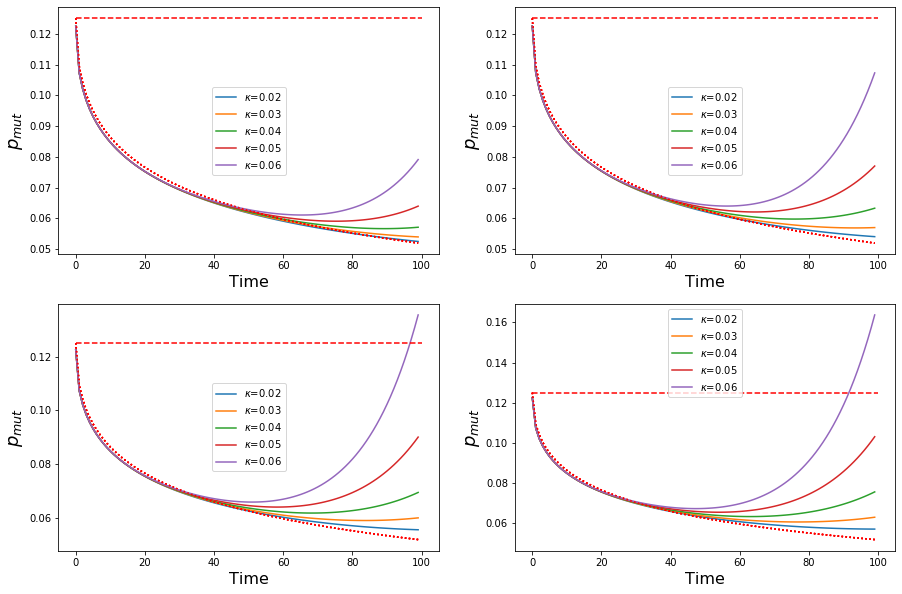

In [17]:
#Calculates the mutant mortality risk coefficient relative to the wild type coefficient across the time span - H2 data - deterministic D_mut
#varies alpha(4) and kappa(5) values

#p_wt = 0.066
#rescale = 1.88
epsilon = 0.02
Tmax = 100

C = np.arange(0,Tmax,1,dtype = int)

fig = plt.subplots(2,2,figsize=(15,10))

for u in range(4):
    if u == 0:
        alpha = 0.000005
        plt.subplot(221)
    if u == 1:
        alpha = 0.00001
        plt.subplot(222) 
    if u == 2:
        alpha = 0.000015 
        plt.subplot(223)
    if u == 3:
        alpha = 0.00002
        plt.subplot(224)
    print()
    mut_dam = np.zeros((5,Tmax))
    for m in range(5):
        for j in range(0,Tmax):  
                mut_dam[m,j] = (1-epsilon)*p_wt2*y[j] + alpha*D_mut_d[m,j]
        test = np.subtract(mut_dam[m,1:Tmax-1], p_wt2*y[1:Tmax-1])
        test = np.abs(test)
        #idx = np.abs(mut_dam[m,1:Tmax-1] - p_wt*y[3,1:Tmax-1]).argmin() 
        #idx = np.subtract(mut_dam[m,:Tmax-1],p_wt*y[3,10:Tmax-1]).argmin()
        idx = np.argmin(test)
        print("p_mut crosses p_wt at T =  %.2f" % (idx+1))                       
        if m==0:
            l1, = plt.plot(C,mut_dam[0,:])
        if m==1:
            l2, = plt.plot(C,mut_dam[1,:])
        if m==2:
            l3, = plt.plot(C,mut_dam[2,:])
        if m==3:
            l4, = plt.plot(C,mut_dam[3,:])
        if m==4:
            l5, = plt.plot(C,mut_dam[4,:])
        plt.plot(C,p_wt2*y[0:Tmax],'r:')
    plt.legend((l1,l2,l3,l4,l5),('$\kappa$=0.02', '$\kappa$=0.03', '$\kappa$=0.04', '$\kappa$=0.05', '$\kappa$=0.06'))
    plt.xlabel("Time",fontsize = 16)
    plt.ylabel("$p_{mut}$",fontsize=18);
    plt.plot([0,Tmax],[p_wt2,p_wt2],'r--');
    #plt.plot([0,Tmax],[(1-epsilon)*p_wt,(1-epsilon)*p_wt],'b--');
    #plt.ylim((1-epsilon)*p_wt-0.002,p_wt+0.005)
    #ymin, ymax = plt.gca().get_ylim()
    #plt.text(0,0.0635, "$\\epsilon$ = {}, $\\alpha$ = {}".format(epsilon,alpha))

### Temporal difference between mutant and wild type population - deterministic damage accumulation

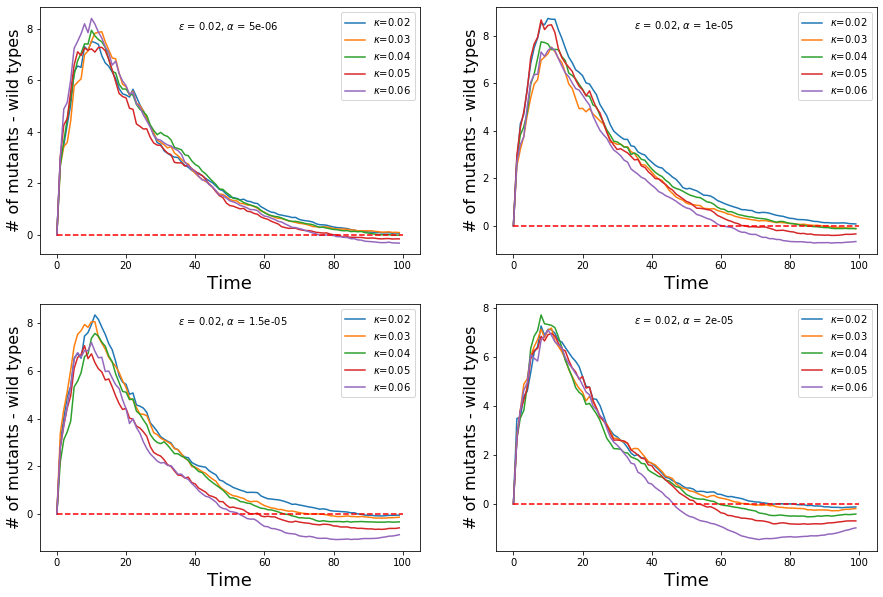

In [18]:
#Calculates the difference in number of survivors between wild type and mutant across the time span - H2 data 
#- deterministic D_mut - decreasing p_wt
#varies alpha(4) and kappa(5) values

epsilon = 0.02
nind = 1000; Tmax = 100; nrepeats_mut = 1000
counter1 = 0

H2_mut_all = np.zeros((20*nrepeats_mut,Tmax))

C = np.arange(0,Tmax,1,dtype = int)

fig = plt.subplots(2,2,figsize=(15,10))

for u in range(4):
    if u == 0:
        alpha = 0.000005
        plt.subplot(221)
    if u == 1:
        alpha = 0.00001
        plt.subplot(222) 
    if u == 2:
        alpha = 0.000015 
        plt.subplot(223)
    if u == 3:
        alpha = 0.00002
        plt.subplot(224)
    
    for m in range(5):
        H2_mut = np.zeros((nrepeats_mut,Tmax),dtype = int)
        for k in range(nrepeats_mut):
            counter1 = counter1 + 1
            s = np.ones((Tmax,nind),dtype = int); 
            for j in range(1,Tmax):
                for i in range(nind):
                    ran = np.random.rand(1)
                    if s[j-1,i] == 1:
                        if ran < (1-epsilon)*p_wt2*y[j] + alpha*D_mut_d[m,j]:
                            s[j,i] = 0
                    if s[j-1,i] == 0:
                        s[j,i] = 0
            H2_mut[k,:] = np.sum(s, axis = 1)
            H2_mut_all[counter1-1,:] = np.sum(s, axis = 1)

        #Calculate the difference in number of survivors between wild type and mutant across the time span - H1 data
        mean_mut = np.mean(H2_mut,axis = 0)
        mean_wt = np.mean(H2_wt,axis = 0)
        diff_mut_wt = mean_mut[0:Tmax] - mean_wt[0:Tmax]
        #plt.plot(C,diff_mut_wt)
        if m==0:
            l1, = plt.plot(C,diff_mut_wt)
        if m==1:
            l2, = plt.plot(C,diff_mut_wt)
        if m==2:
            l3, = plt.plot(C,diff_mut_wt)
        if m==3:
            l4, = plt.plot(C,diff_mut_wt)
        if m==4:
            l5, = plt.plot(C,diff_mut_wt)
    plt.legend((l1,l2,l3,l4,l5),('$\kappa$=0.02', '$\kappa$=0.03', '$\kappa$=0.04', '$\kappa$=0.05', '$\kappa$=0.06'))
    plt.xlabel("Time",fontsize = 18)
    plt.ylabel("# of mutants - wild types",fontsize=16);
    plt.plot([0,Tmax],[0,0],'r--');
    ymin, ymax = plt.gca().get_ylim()
    plt.text(35,0.9*ymax, "$\\epsilon$ = {}, $\\alpha$ = {}".format(epsilon,alpha))
    #plt.text(35,0.9*ymax, "$\epsilon$ = {}, $\alpha$ = {}".format(epsilon,alpha))


#To be used in case one wants to identify the crossing times
#idx = (np.abs(Diff_mut_wt[2:99] - 0.01)).argmin() 
#print("Diff (mut - wt) turns negative at T =  %.2f" % (idx+1))   

### Calculating R0 and r. Deterministic damage accumulation with constant fecundity.

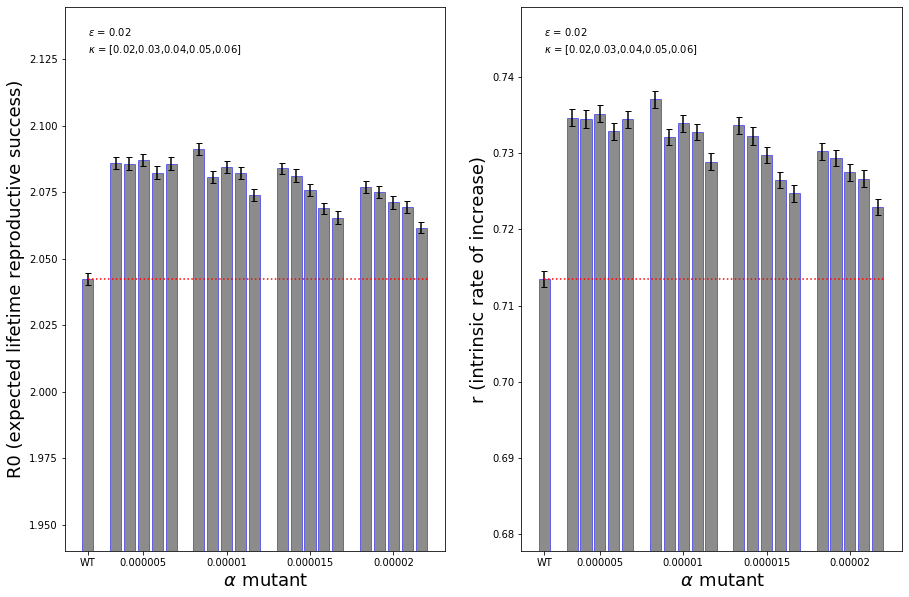

In [19]:
# Calculate r and R0 ratios between wild type and mutant - using H1 data - uses all graphs
from scipy.optimize import brentq
#Taken from: https://scipython.com/book/chapter-8-scipy/examples/solving-the-euler-lotka-equation/

#m(k) = the mean number of live females born per time period per female alive during the k period.
nrepeats_wt = 1000
nrepeats_mut = 1000
R0_mut = np.zeros(20*nrepeats_wt)
r_mut = np.zeros(20*nrepeats_wt)

mean_R0_mut = np.zeros(20)
std_R0_mut = np.zeros(20)
mean_r_mut = np.zeros(20)
std_r_mut = np.zeros(20)
sem_R0_mut = np.zeros(20)
sem_r_mut = np.zeros(20)


r_wt = np.zeros(nrepeats_wt)
R0_wt = np.zeros(nrepeats_wt)

const_fecund = 0.18 #0.1 #0.051
m = const_fecund*np.ones(Tmax)
    
f_wt = (H2_wt/1000.0)*m
f_mut = (H2_mut_all/1000.0)*m

x = np.linspace(1, int(Tmax), 1)

#Calculation for wild type 
# The Euler-Lotka equation: find the one real root in r                                                      
def func(r):
    return np.sum(f * np.exp(-r * x)) - 1

#wild type 
for j in range(nrepeats_wt):
    R0_wt[j] = np.sum(f_wt[j,:])

    a, b = -2, 8 
    f = f_wt[j,:]
    r = brentq(func, a, b)
    r_wt[j] = r

# Calculate mean and std for R0 and r for wild type  
R0_wt_mean = np.mean(R0_wt)
R0_wt_std = np.std(R0_wt)
R0_wt_sem = np.std(R0_wt)/math.sqrt(nrepeats_wt)   
r_wt_mean = np.mean(r_wt)
r_wt_std = np.std(r_wt)
r_wt_sem = np.std(r_wt)/math.sqrt(nrepeats_wt)


#mutant   
for i in range(20*nrepeats_mut):
    #R_mut = np.sum(f_mut[i,:])
    #R0_mut[i] = R_mut
    R0_mut[i] = np.sum(f_mut[i,:])
    
    a, b = -2, 8
    f = f_mut[i,:]
    r = brentq(func, a, b)
    r_mut[i] = r

# Calculate mean and std for R0 and r for every nrepeats chunk for mutant
for k in range(20):
    mean_R0_mut[k] = np.mean(R0_mut[k*nrepeats_mut:k*nrepeats_mut+(nrepeats_mut-1)])
    std_R0_mut[k] = np.std(R0_mut[k*nrepeats_mut:k*nrepeats_mut+(nrepeats_mut-1)])
    sem_R0_mut[k] = np.std(R0_mut[k*nrepeats_mut:k*nrepeats_mut+(nrepeats_mut-1)])/math.sqrt(nrepeats_mut)
    mean_r_mut[k] = np.mean(r_mut[k*nrepeats_mut:k*nrepeats_mut+(nrepeats_mut-1)])
    std_r_mut[k] = np.std(r_mut[k*nrepeats_mut:k*nrepeats_mut+(nrepeats_mut-1)])
    sem_r_mut[k] = np.std(r_mut[k*nrepeats_mut:k*nrepeats_mut+(nrepeats_mut-1)])/math.sqrt(nrepeats_mut)


# Choose the position of each barplots on the x-axis
#y_pos = [0, 2,3,4,5,6, 8,9,10,11,12, 14,15,16,17,18, 20,21,22,23,24] 
y1_pos = [0]
y2_pos = [2,3,4,5,6, 8,9,10,11,12, 14,15,16,17,18, 20,21,22,23,24]
y3_pos = [0,4,10,16,22]

fig = plt.subplots(1,2,figsize=(15,10))
plt.subplot(121)
plt.bar(y1_pos,R0_wt_mean,yerr=R0_wt_sem, align='center', alpha=0.5, ecolor='black', capsize=3,color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue');
plt.bar(y2_pos,mean_R0_mut,yerr=sem_R0_mut, align='center', alpha=0.5, ecolor='black', capsize=3,color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue');
plt.ylim(0.95*R0_wt_mean,1.05*R0_wt_mean)
plt.xticks(y3_pos, ('WT','0.000005','0.00001','0.000015','0.00002'));
plt.ylabel('R0 (expected lifetime reproductive success)',fontsize=18);
plt.xlabel('    $\\alpha$ mutant',fontsize=18);
plt.plot([0, 24.5], [R0_wt_mean, R0_wt_mean], "r:");
ymin, ymax = plt.gca().get_ylim();
plt.text(0,0.995*ymax,"$\\epsilon$ = {}".format(epsilon));
plt.text(0,0.992*ymax,"$\\kappa$ = [{},{},{},{},{}]".format(kappa[0],kappa[1],kappa[2],kappa[3],kappa[4]));

plt.subplot(122)
plt.bar(y1_pos,r_wt_mean,yerr=r_wt_sem, align='center', alpha=0.5, ecolor='black', capsize=3,color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue');
plt.bar(y2_pos,mean_r_mut,yerr=sem_r_mut, align='center', alpha=0.5, ecolor='black', capsize=3,color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue');
plt.ylim(0.95*r_wt_mean,1.05*r_wt_mean)
plt.xticks(y3_pos, ('WT', '0.000005','0.00001','0.000015','0.00002'));
plt.ylabel('r (intrinsic rate of increase)',fontsize=18);
plt.xlabel('    $\\alpha$ mutant',fontsize=18);
plt.plot([0, 24.5], [r_wt_mean, r_wt_mean], "r:");
ymin, ymax = plt.gca().get_ylim();
plt.text(0,0.995*ymax,"$\\epsilon$ = {}".format(epsilon));
plt.text(0,0.992*ymax,"$\\kappa$ = [{},{},{},{},{}]".format(kappa[0],kappa[1],kappa[2],kappa[3],kappa[4]));

### Introduce reduced fecundity as a function of age for the mutant


p_mut crosses p_wt at T =  84.00
p_mut crosses p_wt at T =  69.00
p_mut crosses p_wt at T =  59.00
p_mut crosses p_wt at T =  52.00
p_mut crosses p_wt at T =  47.00

p_mut crosses p_wt at T =  61.00
p_mut crosses p_wt at T =  52.00
p_mut crosses p_wt at T =  45.00
p_mut crosses p_wt at T =  41.00
p_mut crosses p_wt at T =  37.00

p_mut crosses p_wt at T =  49.00
p_mut crosses p_wt at T =  42.00
p_mut crosses p_wt at T =  38.00
p_mut crosses p_wt at T =  34.00
p_mut crosses p_wt at T =  31.00

p_mut crosses p_wt at T =  41.00
p_mut crosses p_wt at T =  36.00
p_mut crosses p_wt at T =  33.00
p_mut crosses p_wt at T =  30.00
p_mut crosses p_wt at T =  28.00


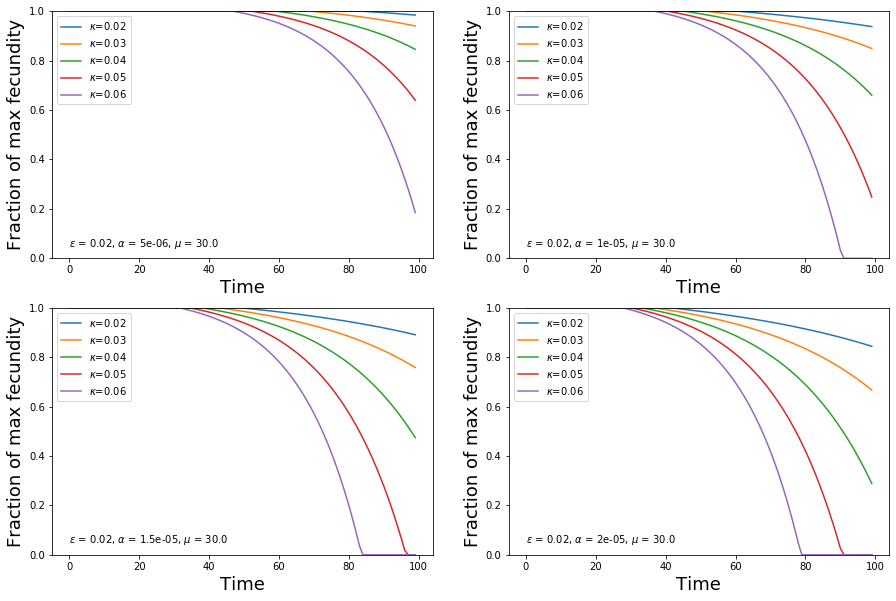

In [120]:
# Calculates fertility curves as a function of somatic damage. Uses a slight revision of the scripts above. 
# deterministic D_mut
# varies alpha(4) and kappa(5) values

#H2 data

epsilon = 0.02
nind = 1000; 
Tmax = 100; 
counter = 0
mu = 30.0

frac_fert = np.zeros((20,Tmax))

C = np.arange(0,Tmax,1,dtype = int)

fig = plt.subplots(2,2,figsize=(15,10))

for u in range(4):
    if u == 0:
        alpha = 0.000005
        plt.subplot(221)
    if u == 1:
        alpha = 0.00001
        plt.subplot(222) 
    if u == 2:
        alpha = 0.000015 
        plt.subplot(223)
    if u == 3:
        alpha = 0.00002
        plt.subplot(224)
    print()
    mut_dam = np.zeros((5,Tmax))
    fert_mut = np.ones((5,Tmax))
    for m in range(5):
        counter = counter + 1
        for j in range(0,Tmax):  
                mut_dam[m,j] = (1-epsilon)*p_wt2*y[j] + alpha*D_mut_d[m,j]
                #caluclates the fertility decline
                if mut_dam[m,j]> p_wt2*y[j]:
                    fert_mut[m,j] = 1.0-mu*(mut_dam[m,j]-p_wt2*y[j])
                    if fert_mut[m,j] <= 0.0:
                        fert_mut[m,j] = 0.0
        idx = (np.abs(mut_dam[m,1:Tmax-1] - p_wt2*y[1:Tmax-1])).argmin() 
        print("p_mut crosses p_wt at T =  %.2f" % (idx+1))
        frac_fert[counter-1,:] = fert_mut[m,:]
        if m==0:
            l1, = plt.plot(C,fert_mut[0,:])
        if m==1:
            l2, = plt.plot(C,fert_mut[1,:])
        if m==2:
            l3, = plt.plot(C,fert_mut[2,:])
        if m==3:
            l4, = plt.plot(C,fert_mut[3,:])
        if m==4:
            l5, = plt.plot(C,fert_mut[4,:])
    plt.legend((l1,l2,l3,l4,l5),('$\kappa$=0.02', '$\kappa$=0.03', '$\kappa$=0.04', '$\kappa$=0.05', '$\kappa$=0.06'))
    plt.xlabel("Time",fontsize = 18)
    plt.ylabel("Fraction of max fecundity",fontsize=18);
    #plt.plot([0,Tmax],[p_wt,p_wt],'r--');
    #plt.plot([0,Tmax],[(1-epsilon)*p_wt,(1-epsilon)*p_wt],'b--');
    plt.ylim(0,1.0)
    #ymin, ymax = plt.gca().get_ylim()
    plt.text(0,0.0475, "$\\epsilon$ = {}, $\\alpha$ = {}, $\\mu$ = {}".format(epsilon,alpha,mu))

### R0 and r - damage-dependent fecundity

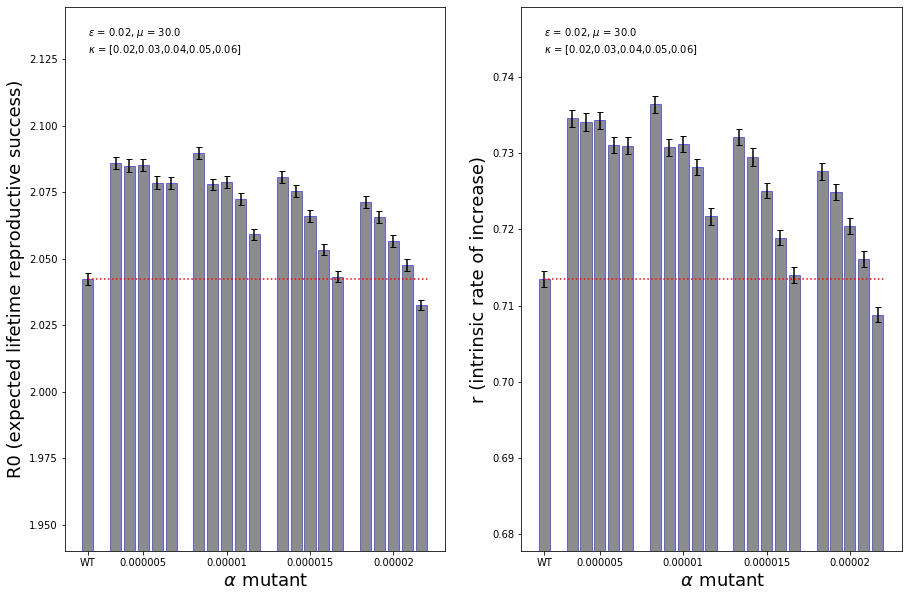

In [20]:
# Calculate r and R0 ratios between wild type and mutant - using H1 data and fertiliy graphs above
from scipy.optimize import brentq
#Taken from: https://scipython.com/book/chapter-8-scipy/examples/solving-the-euler-lotka-equation/

#m(k) = the mean number of live females born per time period per female alive during the k period.
#m = const_fecund*np.ones(Tmax)
nrepeats_wt = 1000
nrepeats_mut = 1000
R0_mut = np.zeros(20*nrepeats_wt)
r_mut = np.zeros(20*nrepeats_wt)

m_mut = np.zeros((20*nrepeats_mut,Tmax))
#f_mut = np.zeros((20*nrepeats_mut,Tmax))

mean_R0_mut = np.zeros(20)
std_R0_mut = np.zeros(20)
mean_r_mut = np.zeros(20)
std_r_mut = np.zeros(20)
sem_R0_mut = np.zeros(20)
sem_r_mut = np.zeros(20)


r_wt = np.zeros(nrepeats_wt)
R0_wt = np.zeros(nrepeats_wt)

const_fecund = 0.18 #0.1 #0.051
m_wt = const_fecund*np.ones(Tmax)
#m_mut = const_fecund*m1
    
f_wt = (H2_wt/1000.0)*m_wt
f_mut = (H2_mut_all/1000.0)*m_mut

x = np.linspace(1, int(Tmax), 1)

#Calculation for wild type 
# The Euler-Lotka equation: find the one real root in r                                                      
def func(r):
    return np.sum(f * np.exp(-r * x)) - 1

#wild type 
for j in range(nrepeats_wt):
    R0_wt[j] = np.sum(f_wt[j,:])

    a, b = -2, 8 
    f = f_wt[j,:]
    r = brentq(func, a, b)
    r_wt[j] = r

# Calculate mean and std for R0 and r for wild type  
R0_wt_mean = np.mean(R0_wt)
R0_wt_std = np.std(R0_wt)
R0_wt_sem = np.std(R0_wt)/math.sqrt(nrepeats_wt)   
r_wt_mean = np.mean(r_wt)
r_wt_std = np.std(r_wt)
r_wt_sem = np.std(r_wt)/math.sqrt(nrepeats_wt)

counter = 0
for z in range(20):
    for s in range(nrepeats_mut):
        counter = counter + 1
        m_mut[counter-1,:] = const_fecund*frac_fert[z,:]

f_mut = np.multiply(H2_mut_all/1000.0,m_mut)

# Calculate mean and std for R0 and r for mutant   
for i in range(20*nrepeats_mut):
    R0_mut[i] = np.sum(f_mut[i,:])

    a, b = -2, 8
    f = f_mut[i,:]
    r = brentq(func, a, b)
    r_mut[i] = r

# Calculate mean and std for R0 and r for every nrepeats chunk for mutant
for k in range(20):
    mean_R0_mut[k] = np.mean(R0_mut[k*nrepeats_mut:k*nrepeats_mut+(nrepeats_mut-1)])
    std_R0_mut[k] = np.std(R0_mut[k*nrepeats_mut:k*nrepeats_mut+(nrepeats_mut-1)])
    sem_R0_mut[k] = np.std(R0_mut[k*nrepeats_mut:k*nrepeats_mut+(nrepeats_mut-1)])/math.sqrt(nrepeats_mut)
    mean_r_mut[k] = np.mean(r_mut[k*nrepeats_mut:k*nrepeats_mut+(nrepeats_mut-1)])
    std_r_mut[k] = np.std(r_mut[k*nrepeats_mut:k*nrepeats_mut+(nrepeats_mut-1)])
    sem_r_mut[k] = np.std(r_mut[k*nrepeats_mut:k*nrepeats_mut+(nrepeats_mut-1)])/math.sqrt(nrepeats_mut)


# Choose the position of each barplots on the x-axis
#y_pos = [0, 2,3,4,5,6, 8,9,10,11,12, 14,15,16,17,18, 20,21,22,23,24] 
y1_pos = [0]
y2_pos = [2,3,4,5,6, 8,9,10,11,12, 14,15,16,17,18, 20,21,22,23,24]
y3_pos = [0,4,10,16,22]

fig = plt.subplots(1,2,figsize=(15,10))
plt.subplot(121)
plt.bar(y1_pos,R0_wt_mean,yerr=R0_wt_sem, align='center', alpha=0.5, ecolor='black', capsize=3,color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue');
plt.bar(y2_pos,mean_R0_mut,yerr=sem_R0_mut, align='center', alpha=0.5, ecolor='black', capsize=3,color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue');
plt.ylim(0.95*R0_wt_mean,1.05*R0_wt_mean)
plt.xticks(y3_pos, ('WT','0.000005','0.00001','0.000015','0.00002'));
plt.ylabel('R0 (expected lifetime reproductive success)',fontsize=18);
plt.xlabel('    $\\alpha$ mutant',fontsize=18);
plt.plot([0, 24.5], [R0_wt_mean, R0_wt_mean], "r:");
ymin, ymax = plt.gca().get_ylim();
plt.text(0,0.995*ymax,"$\\epsilon$ = {}, $\\mu$ = {}".format(epsilon,mu));
plt.text(0,0.992*ymax,"$\\kappa$ = [{},{},{},{},{}]".format(kappa[0],kappa[1],kappa[2],kappa[3],kappa[4]));

plt.subplot(122)
plt.bar(y1_pos,r_wt_mean,yerr=r_wt_sem, align='center', alpha=0.5, ecolor='black', capsize=3,color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue');
plt.bar(y2_pos,mean_r_mut,yerr=sem_r_mut, align='center', alpha=0.5, ecolor='black', capsize=3,color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue');
plt.ylim(0.95*r_wt_mean,1.05*r_wt_mean)
plt.xticks(y3_pos, ('WT', '0.000005','0.00001','0.000015','0.00002'));
plt.ylabel('r (intrinsic rate of increase)',fontsize=18);
plt.xlabel('    $\\alpha$ mutant',fontsize=18);
plt.plot([0, 24.5], [r_wt_mean, r_wt_mean], "r:");
ymin, ymax = plt.gca().get_ylim();
plt.text(0,0.995*ymax,"$\\epsilon$ = {}, $\\mu$ = {}".format(epsilon,mu));
plt.text(0,0.992*ymax,"$\\kappa$ = [{},{},{},{},{}]".format(kappa[0],kappa[1],kappa[2],kappa[3],kappa[4]));

# Predict survivorship curves based on minimal extrinsic mortality and intrinsic mortality based on the five damage functions 

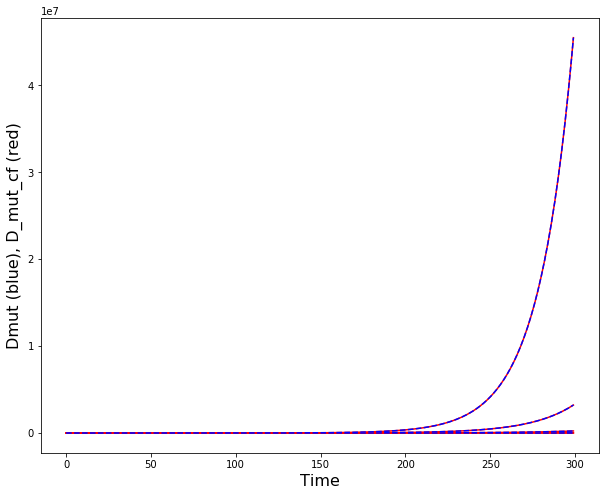

In [40]:
#Making damage functions with extended time frame

Tmax = 300
psi_0 = 1.0 #0.003 #0.0015 #daily damage creation in wild type 
kappa = [0.01, 0.02, 0.03, 0.04, 0.05]

#D_mut = np.zeros(Tmax); 
D_mut_analyt = np.zeros((5,Tmax)); #Predeclaration of arrays
D_mut = np.zeros((5,Tmax))

C = np.arange(0,Tmax,1,dtype = int) 

#Somatic damage recursion
fig = plt.subplots(1,1,figsize=(10,8))
plt.subplot(111)
for i in range(5):
    D_mut[i,0] = psi_0
    D_mut_analyt[i,0] = psi_0
    for j in range(1,Tmax):
        #delta_k = delta_0*lamda*epsilon + np.sqrt(kappa*D[j-1])
        psi_mut = psi_0 + kappa[i]*D_mut[i,j-1]
        D_mut[i,j] = psi_mut + D_mut[i,j-1]
        D_mut_analyt[i,j] = (psi_0/kappa[i])*((1+kappa[i])**(j+1) - 1.0)
    
    plt.plot(C,D_mut[i,:],'r-')
    plt.plot(C,D_mut_analyt[i,:],'b--')
plt.xlabel("Time",fontsize=16);
plt.ylabel("Dmut (blue), D_mut_cf (red)",fontsize=16);



KeyboardInterrupt: 

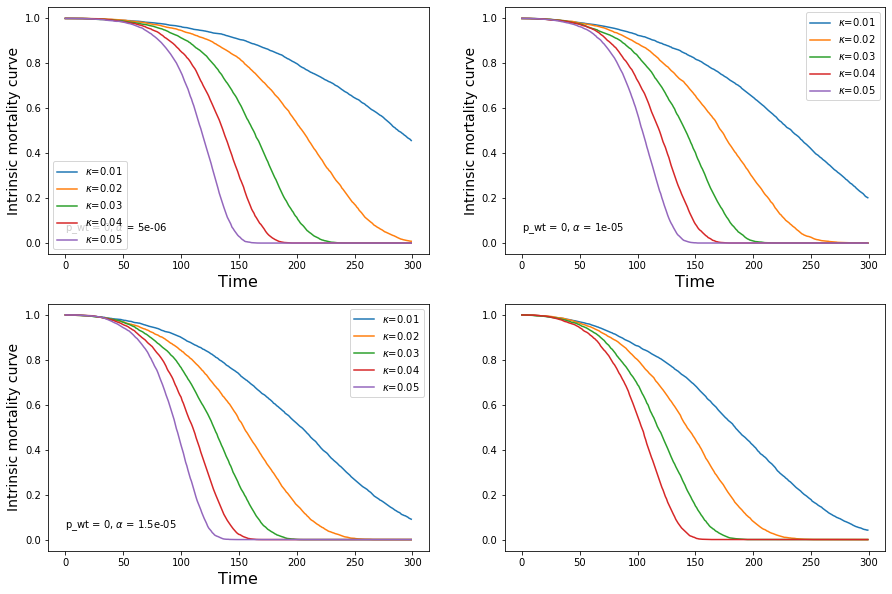

In [44]:
#Calculates the intrinsic mortality curve
#varies alpha(4) and kappa(5) values
#Note the difference between extrinsic and intrinsic mortality. The curves below mimics the natural condition, ie. the probability of dying by 
#extrinsic mortality when your fitness gets reduced due to somatic damage. But you do not necessarily die from this damage. So how can this be reconciled with
#the probability of dying directly from intrinsic mortality? Is reduced capacity to run and fight etc a proxy for intrinsic mortality death. If alpha is allowed
#to decrease? Or can one just say that the curves are lower bounds for intrinsic mortality? p_wt + (1-constant) (alpha*D_mut[]) could then define an upper bound.
#Reasonable to assume that the saving of somatic maintenance energy is stretched to the maximum

#p_wt = 0.00001
#epsilon = 0.0002
#alpha = 0.000005 #0.05
nind = 1000; Tmax = 300; nrepeats_mut = 5
counter1 = 0

a_conv = 1.0 #0.5
#H1_mut_all = np.zeros((20*nrepeats_mut,Tmax))

C = np.arange(0,Tmax,1,dtype = int)

fig = plt.subplots(2,2,figsize=(15,10))

for u in range(4):
    if u == 0:
        alpha = 0.000005*a_conv
        plt.subplot(221)
    if u == 1:
        alpha = 0.00001*a_conv
        plt.subplot(222) 
    if u == 2:
        alpha = 0.000015*a_conv
        plt.subplot(223)
    if u == 3:
        alpha = 0.00002*a_conv
        plt.subplot(224)
    
    for m in range(5):
        H1_mut = np.zeros((nrepeats_mut,Tmax),dtype = int)
        for k in range(nrepeats_mut):
            counter1 = counter1 + 1
            s = np.ones((Tmax,nind),dtype = int); 
            for j in range(1,Tmax):
                for i in range(nind):
                    ran = np.random.rand(1)
                    if s[j-1,i] == 1:
                        #if ran < p_wt + alpha*D_mut[m,j]:
                        if ran < alpha*D_mut[m,j]:
                            s[j,i] = 0
                    if s[j-1,i] == 0:
                        s[j,i] = 0
            H1_mut[k,:] = np.sum(s, axis = 1)
            #H1_mut_all[counter1-1,:] = np.sum(s, axis = 1)

        #Calculate the difference in number of survivors between wild type and mutant across the time span - H1 data
        mean_mut = np.mean(H1_mut,axis = 0)
        #mean_wt = np.mean(H1_wt,axis = 0)
        #diff_mut_wt = mean_mut - mean_wt
        #plt.plot(C,mean_mut)
        if m==0:
            l1, = plt.plot(C,mean_mut/nind)
        if m==1:
            l2, = plt.plot(C,mean_mut/nind)
        if m==2:
            l3, = plt.plot(C,mean_mut/nind)
        if m==3:
            l4, = plt.plot(C,mean_mut/nind)
        if m==4:
            l5, = plt.plot(C,mean_mut/nind)
    plt.legend((l1,l2,l3,l4,l5),('$\kappa$=0.01', '$\kappa$=0.02', '$\kappa$=0.03', '$\kappa$=0.04', '$\kappa$=0.05'))
    plt.xlabel("Time",fontsize = 16)
    plt.ylabel("Intrinsic mortality curve",fontsize=14);
    #plt.plot([0,Tmax],[0,0],'r--');
    ymin, ymax = plt.gca().get_ylim()
    plt.text(0,0.05*ymax, 'p_wt = 0, $\\alpha$ = {}'.format(alpha))
    #plt.text(35,0.9*ymax, "$\epsilon$ = {}, $\alpha$ = {}".format(epsilon,alpha)) 
    #Hanna Froy, Jane Reed
    #Under which conditions will one get a marked proportion of aged individuals

### Temporal difference between mutant and wild type population - stochastic damage accumulation

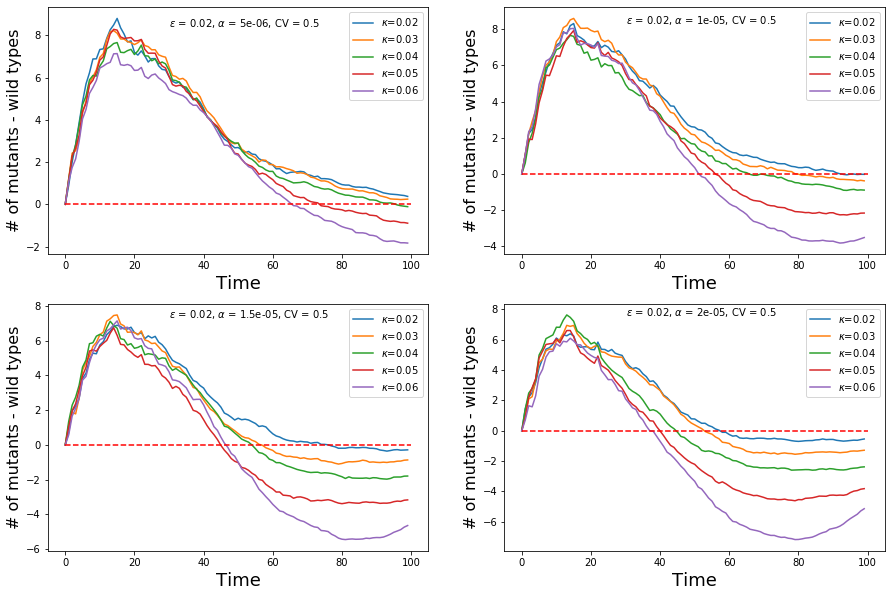

In [503]:
#Calculates the difference in number of survivors between wild type and mutant across the time span - H1 data - stochastic D_mut
#varies alpha(4) and kappa(5) values

p_wt = 0.05
epsilon = 0.02
#alpha = 0.000005 #0.05
nind = 1000; Tmax = 100; nrepeats_mut = 1000
counter1 = 0

H1_mut_all_s = np.zeros((20*nrepeats_mut,Tmax))

C = np.arange(0,Tmax,1,dtype = int)

fig = plt.subplots(2,2,figsize=(15,10))

#Inputs for stochastic D_mut_s[j] calculation
psi_0 = 1.0
kappa = [0.02, 0.03, 0.04, 0.05, 0.06]
kappa_CV = 0.5

for u in range(4):
    if u == 0:
        alpha = 0.000005
        plt.subplot(221)
    if u == 1:
        alpha = 0.00001
        plt.subplot(222) 
    if u == 2:
        alpha = 0.000015 
        plt.subplot(223)
    if u == 3:
        alpha = 0.00002
        plt.subplot(224)
    
    for m in range(5):
        H1_mut_s = np.zeros((nrepeats_mut,Tmax),dtype = int)
        for k in range(nrepeats_mut):
            counter1 = counter1 + 1
            s = np.ones((Tmax,nind),dtype = int);
            D_mut_s = np.zeros(Tmax)
            D_mut_s[0] = psi_0
            for j in range(1,Tmax):
                kappa_s = np.random.normal(loc = kappa[m], scale = kappa[m]*kappa_CV, size = 1)
                psi_0_s = np.random.normal(loc = psi_0, scale = psi_0*kappa_CV, size = 1)
                psi_mut_s = psi_0_s + kappa_s*D_mut_s[j-1]
                D_mut_s[j] = psi_mut_s + D_mut_s[j-1]
                for i in range(nind):
                    ran = np.random.rand(1)
                    if s[j-1,i] == 1:
                        if ran < (1-epsilon)*p_wt + alpha*D_mut_s[j]:
                            s[j,i] = 0
                    if s[j-1,i] == 0:
                        s[j,i] = 0
            H1_mut_s[k,:] = np.sum(s, axis = 1)
            H1_mut_all_s[counter1-1,:] = np.sum(s, axis = 1)

        #Calculate the difference in number of survivors between wild type and mutant across the time span - H1 data
        mean_mut = np.mean(H1_mut_s,axis = 0)
        mean_wt = np.mean(H1_wt,axis = 0)
        diff_mut_wt = mean_mut - mean_wt
        if m==0:
            l1, = plt.plot(C,diff_mut_wt)
        if m==1:
            l2, = plt.plot(C,diff_mut_wt)
        if m==2:
            l3, = plt.plot(C,diff_mut_wt)
        if m==3:
            l4, = plt.plot(C,diff_mut_wt)
        if m==4:
            l5, = plt.plot(C,diff_mut_wt)
    plt.legend((l1,l2,l3,l4,l5),('$\kappa$=0.02', '$\kappa$=0.03', '$\kappa$=0.04', '$\kappa$=0.05', '$\kappa$=0.06'))
    plt.xlabel("Time",fontsize = 18)
    plt.ylabel("# of mutants - wild types",fontsize=16);
    plt.plot([0,Tmax],[0,0],'r--');
    ymin, ymax = plt.gca().get_ylim()
    plt.text(30,0.9*ymax, "$\\epsilon$ = {}, $\\alpha$ = {}, CV = {}".format(epsilon,alpha,kappa_CV))
    #plt.text(35,0.9*ymax, "$\epsilon$ = {}, $\alpha$ = {}".format(epsilon,alpha))

#To be used in case one wants to identify the crossing times
#idx = (np.abs(Diff_mut_wt[2:99] - 0.01)).argmin() 
#print("Diff (mut - wt) turns negative at T =  %.2f" % (idx+1))   

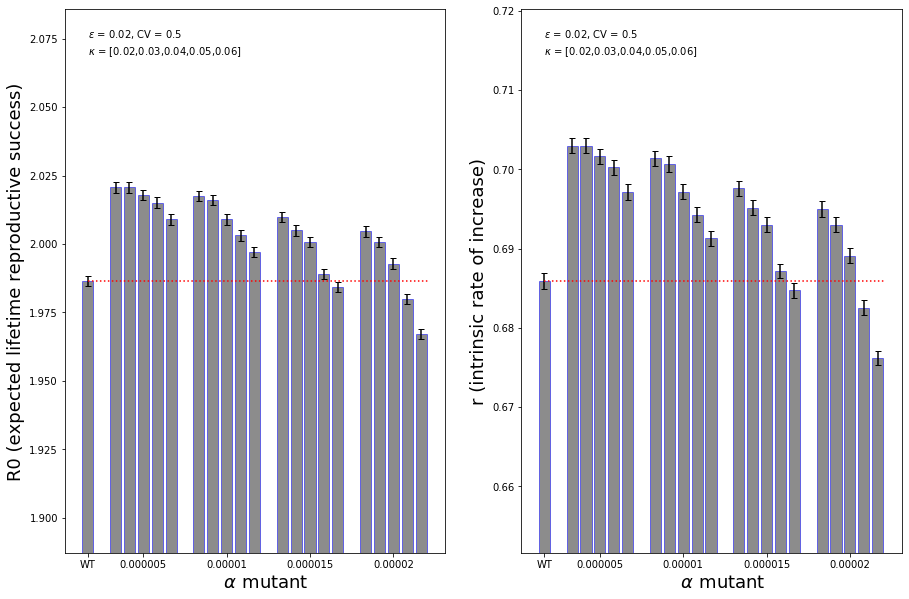

In [504]:
# Calculate r and R0 ratios between wild type and mutant - using H1 data - uses all graphs - stochastic damage accumulation
from scipy.optimize import brentq
#Taken from: https://scipython.com/book/chapter-8-scipy/examples/solving-the-euler-lotka-equation/

#m(k) = the mean number of live females born per time period per female alive during the k period.
#m = const_fecund*np.ones(Tmax)
nrepeats_wt = 1000
nrepeats_mut = 1000
R0_mut = np.zeros(20*nrepeats_wt)
r_mut = np.zeros(20*nrepeats_wt)

mean_R0_mut = np.zeros(20)
std_R0_mut = np.zeros(20)
mean_r_mut = np.zeros(20)
std_r_mut = np.zeros(20)
sem_R0_mut = np.zeros(20)
sem_r_mut = np.zeros(20)


r_wt = np.zeros(nrepeats_wt)
R0_wt = np.zeros(nrepeats_wt)

const_fecund = 0.1 #0.051
m = const_fecund*np.ones(Tmax)
    
f_wt = (H1_wt/1000.0)*m
f_mut = (H1_mut_all_s/1000.0)*m

x = np.linspace(1, int(Tmax), 1)

#Calculation for wild type 
# The Euler-Lotka equation: find the one real root in r                                                      
def func(r):
    return np.sum(f * np.exp(-r * x)) - 1

#wild type 
for j in range(nrepeats_wt):
    R0_wt[j] = np.sum(f_wt[j,:])

    a, b = -2, 8 
    f = f_wt[j,:]
    r = brentq(func, a, b)
    r_wt[j] = r

# Calculate mean and std for R0 and r for wild type  
R0_wt_mean = np.mean(R0_wt)
R0_wt_std = np.std(R0_wt)
R0_wt_sem = np.std(R0_wt)/math.sqrt(nrepeats_wt)   
r_wt_mean = np.mean(r_wt)
r_wt_std = np.std(r_wt)
r_wt_sem = np.std(r_wt)/math.sqrt(nrepeats_wt)


#mutant   
for i in range(20*nrepeats_mut):
    #R_mut = np.sum(f_mut[i,:])
    #R0_mut[i] = R_mut
    R0_mut[i] = np.sum(f_mut[i,:])
    
    a, b = -2, 8
    f = f_mut[i,:]
    r = brentq(func, a, b)
    r_mut[i] = r

# Calculate mean and std for R0 and r for every nrepeats chunk for mutant
for k in range(20):
    mean_R0_mut[k] = np.mean(R0_mut[k*nrepeats_mut:k*nrepeats_mut+(nrepeats_mut-1)])
    std_R0_mut[k] = np.std(R0_mut[k*nrepeats_mut:k*nrepeats_mut+(nrepeats_mut-1)])
    sem_R0_mut[k] = np.std(R0_mut[k*nrepeats_mut:k*nrepeats_mut+(nrepeats_mut-1)])/math.sqrt(nrepeats_mut)
    mean_r_mut[k] = np.mean(r_mut[k*nrepeats_mut:k*nrepeats_mut+(nrepeats_mut-1)])
    std_r_mut[k] = np.std(r_mut[k*nrepeats_mut:k*nrepeats_mut+(nrepeats_mut-1)])
    sem_r_mut[k] = np.std(r_mut[k*nrepeats_mut:k*nrepeats_mut+(nrepeats_mut-1)])/math.sqrt(nrepeats_mut)

# Choose the position of each barplots on the x-axis
#y_pos = [0, 2,3,4,5,6, 8,9,10,11,12, 14,15,16,17,18, 20,21,22,23,24] 
y1_pos = [0]
y2_pos = [2,3,4,5,6, 8,9,10,11,12, 14,15,16,17,18, 20,21,22,23,24]
y3_pos = [0,4,10,16,22]

fig = plt.subplots(1,2,figsize=(15,10))
plt.subplot(121)
plt.bar(y1_pos,R0_wt_mean,yerr=R0_wt_sem, align='center', alpha=0.5, ecolor='black', capsize=3,color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue');
plt.bar(y2_pos,mean_R0_mut,yerr=sem_R0_mut, align='center', alpha=0.5, ecolor='black', capsize=3,color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue');
plt.ylim(0.95*R0_wt_mean,1.05*R0_wt_mean)
plt.xticks(y3_pos, ('WT','0.000005','0.00001','0.000015','0.00002'));
plt.ylabel('R0 (expected lifetime reproductive success)',fontsize=18);
plt.xlabel('    $\\alpha$ mutant',fontsize=18);
plt.plot([0, 24.5], [R0_wt_mean, R0_wt_mean], "r:");
ymin, ymax = plt.gca().get_ylim();
plt.text(0,0.995*ymax,"$\\epsilon$ = {}, CV = {}".format(epsilon,kappa_CV));
plt.text(0,0.992*ymax,"$\\kappa$ = [{},{},{},{},{}]".format(kappa[0],kappa[1],kappa[2],kappa[3],kappa[4]));

plt.subplot(122)
plt.bar(y1_pos,r_wt_mean,yerr=r_wt_sem, align='center', alpha=0.5, ecolor='black', capsize=3,color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue');
plt.bar(y2_pos,mean_r_mut,yerr=sem_r_mut, align='center', alpha=0.5, ecolor='black', capsize=3,color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue');
plt.ylim(0.95*r_wt_mean,1.05*r_wt_mean)
plt.xticks(y3_pos, ('WT', '0.000005','0.00001','0.000015','0.00002'));
plt.ylabel('r (intrinsic rate of increase)',fontsize=18);
plt.xlabel('    $\\alpha$ mutant',fontsize=18);
plt.plot([0, 24.5], [r_wt_mean, r_wt_mean], "r:");
ymin, ymax = plt.gca().get_ylim();
plt.text(0,0.995*ymax,"$\\epsilon$ = {}, CV = {}".format(epsilon,kappa_CV));
plt.text(0,0.992*ymax,"$\\kappa$ = [{},{},{},{},{}]".format(kappa[0],kappa[1],kappa[2],kappa[3],kappa[4]));

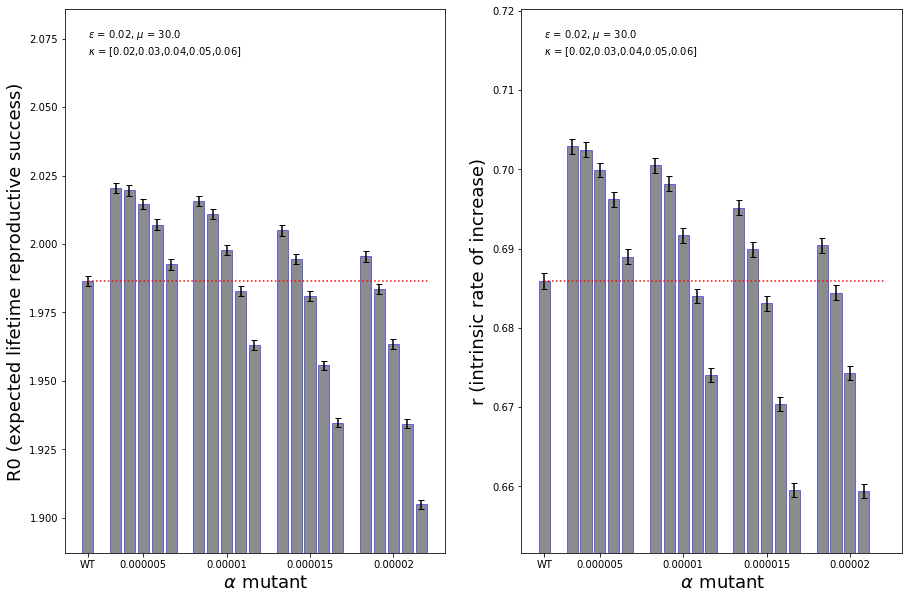

In [505]:
# Calculate r and R0 ratios between wild type and mutant - using H1 data, stochastic damage accumulation and fertiliy graphs above
from scipy.optimize import brentq
#Taken from: https://scipython.com/book/chapter-8-scipy/examples/solving-the-euler-lotka-equation/

#m(k) = the mean number of live females born per time period per female alive during the k period.
#m = const_fecund*np.ones(Tmax)
nrepeats_wt = 1000
nrepeats_mut = 1000
R0_mut = np.zeros(20*nrepeats_wt)
r_mut = np.zeros(20*nrepeats_wt)

m_mut = np.zeros((20*nrepeats_mut,Tmax))
#f_mut = np.zeros((20*nrepeats_mut,Tmax))

mean_R0_mut = np.zeros(20)
std_R0_mut = np.zeros(20)
mean_r_mut = np.zeros(20)
std_r_mut = np.zeros(20)
sem_R0_mut = np.zeros(20)
sem_r_mut = np.zeros(20)


r_wt = np.zeros(nrepeats_wt)
R0_wt = np.zeros(nrepeats_wt)

const_fecund = 0.1 #0.051
m_wt = const_fecund*np.ones(Tmax)
#m_mut = const_fecund*m1
    
f_wt = (H1_wt/1000.0)*m_wt
#f_mut = (H1_mut_all/1000.0)*m_mut

x = np.linspace(1, int(Tmax), 1)

#Calculation for wild type 
# The Euler-Lotka equation: find the one real root in r                                                      
def func(r):
    return np.sum(f * np.exp(-r * x)) - 1

#wild type 
for j in range(nrepeats_wt):
    R0_wt[j] = np.sum(f_wt[j,:])

    a, b = -2, 8 
    f = f_wt[j,:]
    r = brentq(func, a, b)
    r_wt[j] = r

# Calculate mean and std for R0 and r for wild type  
R0_wt_mean = np.mean(R0_wt)
R0_wt_std = np.std(R0_wt)
R0_wt_sem = np.std(R0_wt)/math.sqrt(nrepeats_wt)   
r_wt_mean = np.mean(r_wt)
r_wt_std = np.std(r_wt)
r_wt_sem = np.std(r_wt)/math.sqrt(nrepeats_wt)

counter = 0
for z in range(20):
    for s in range(nrepeats_mut):
        counter = counter + 1
        m_mut[counter-1,:] = const_fecund*frac_fert[z,:]

f_mut = np.multiply(H1_mut_all_s/1000.0,m_mut)

# Calculate mean and std for R0 and r for mutant   
for i in range(20*nrepeats_mut):
    R0_mut[i] = np.sum(f_mut[i,:])

    a, b = -2, 8
    f = f_mut[i,:]
    r = brentq(func, a, b)
    r_mut[i] = r

# Calculate mean and std for R0 and r for every nrepeats chunk for mutant
for k in range(20):
    mean_R0_mut[k] = np.mean(R0_mut[k*nrepeats_mut:k*nrepeats_mut+(nrepeats_mut-1)])
    std_R0_mut[k] = np.std(R0_mut[k*nrepeats_mut:k*nrepeats_mut+(nrepeats_mut-1)])
    sem_R0_mut[k] = np.std(R0_mut[k*nrepeats_mut:k*nrepeats_mut+(nrepeats_mut-1)])/math.sqrt(nrepeats_mut)
    mean_r_mut[k] = np.mean(r_mut[k*nrepeats_mut:k*nrepeats_mut+(nrepeats_mut-1)])
    std_r_mut[k] = np.std(r_mut[k*nrepeats_mut:k*nrepeats_mut+(nrepeats_mut-1)])
    sem_r_mut[k] = np.std(r_mut[k*nrepeats_mut:k*nrepeats_mut+(nrepeats_mut-1)])/math.sqrt(nrepeats_mut)

# Choose the position of each barplots on the x-axis
#y_pos = [0, 2,3,4,5,6, 8,9,10,11,12, 14,15,16,17,18, 20,21,22,23,24] 
y1_pos = [0]
y2_pos = [2,3,4,5,6, 8,9,10,11,12, 14,15,16,17,18, 20,21,22,23,24]
y3_pos = [0,4,10,16,22]

fig = plt.subplots(1,2,figsize=(15,10))
plt.subplot(121)
plt.bar(y1_pos,R0_wt_mean,yerr=R0_wt_sem, align='center', alpha=0.5, ecolor='black', capsize=3,color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue');
plt.bar(y2_pos,mean_R0_mut,yerr=sem_R0_mut, align='center', alpha=0.5, ecolor='black', capsize=3,color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue');
plt.ylim(0.95*R0_wt_mean,1.05*R0_wt_mean)
plt.xticks(y3_pos, ('WT','0.000005','0.00001','0.000015','0.00002'));
plt.ylabel('R0 (expected lifetime reproductive success)',fontsize=18);
plt.xlabel('    $\\alpha$ mutant',fontsize=18);
plt.plot([0, 24.5], [R0_wt_mean, R0_wt_mean], "r:");
ymin, ymax = plt.gca().get_ylim();
plt.text(0,0.995*ymax,"$\\epsilon$ = {}, $\\mu$ = {}".format(epsilon,mu));
plt.text(0,0.992*ymax,"$\\kappa$ = [{},{},{},{},{}]".format(kappa[0],kappa[1],kappa[2],kappa[3],kappa[4]));

plt.subplot(122)
plt.bar(y1_pos,r_wt_mean,yerr=r_wt_sem, align='center', alpha=0.5, ecolor='black', capsize=3,color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue');
plt.bar(y2_pos,mean_r_mut,yerr=sem_r_mut, align='center', alpha=0.5, ecolor='black', capsize=3,color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue');
plt.ylim(0.95*r_wt_mean,1.05*r_wt_mean)
plt.xticks(y3_pos, ('WT', '0.000005','0.00001','0.000015','0.00002'));
plt.ylabel('r (intrinsic rate of increase)',fontsize=18);
plt.xlabel('    $\\alpha$ mutant',fontsize=18);
plt.plot([0, 24.5], [r_wt_mean, r_wt_mean], "r:");
ymin, ymax = plt.gca().get_ylim();
plt.text(0,0.995*ymax,"$\\epsilon$ = {}, $\\mu$ = {}".format(epsilon,mu));
plt.text(0,0.992*ymax,"$\\kappa$ = [{},{},{},{},{}]".format(kappa[0],kappa[1],kappa[2],kappa[3],kappa[4]));

### Predict survivorship curves based on minimal extrinsic mortality and intrinsic mortality based on the five damage functions 

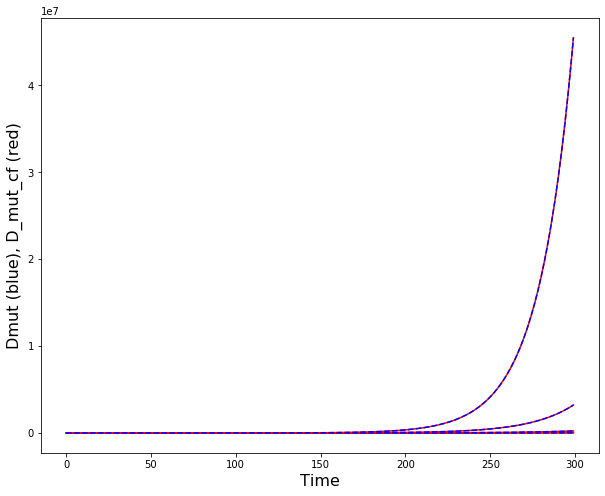

In [48]:
#Making damage functions with extended time frame

Tmax = 300
psi_0 = 1.0 #0.003 #0.0015 #daily damage creation in wild type 
kappa = [0.02, 0.025, 0.03, 0.04, 0.05]

#D_mut = np.zeros(Tmax); 
D_mut_analyt = np.zeros((5,Tmax)); #Predeclaration of arrays
D_mut = np.zeros((5,Tmax))

C = np.arange(0,Tmax,1,dtype = int) 

#Somatic damage recursion
fig = plt.subplots(1,1,figsize=(10,8))
plt.subplot(111)
for i in range(5):
    D_mut[i,0] = psi_0
    D_mut_analyt[i,0] = psi_0
    for j in range(1,Tmax):
        #delta_k = delta_0*lamda*epsilon + np.sqrt(kappa*D[j-1])
        psi_mut = psi_0 + kappa[i]*D_mut[i,j-1]
        D_mut[i,j] = psi_mut + D_mut[i,j-1]
        D_mut_analyt[i,j] = (psi_0/kappa[i])*((1+kappa[i])**(j+1) - 1.0)
    
    plt.plot(C,D_mut[i,:],'r-')
    plt.plot(C,D_mut_analyt[i,:],'b--')
plt.xlabel("Time",fontsize=16);
plt.ylabel("Dmut (blue), D_mut_cf (red)",fontsize=16);




125
300
0.41471571906354515

113
273
0.4117647058823529

108
240
0.4476987447698745

93
195
0.4742268041237113

82
164
0.49693251533742333


100
282
0.35231316725978645

93
241
0.38333333333333336

88
212
0.41232227488151657

78
174
0.44508670520231214

70
151
0.46


84
267
0.31203007518796994

80
225
0.35267857142857145

74
202
0.36318407960199006

68
164
0.4110429447852761

63
141
0.44285714285714284


78
244
0.3168724279835391

73
217
0.3333333333333333

69
195
0.35051546391752575

62
159
0.3860759493670886

57
136
0.4148148148148148



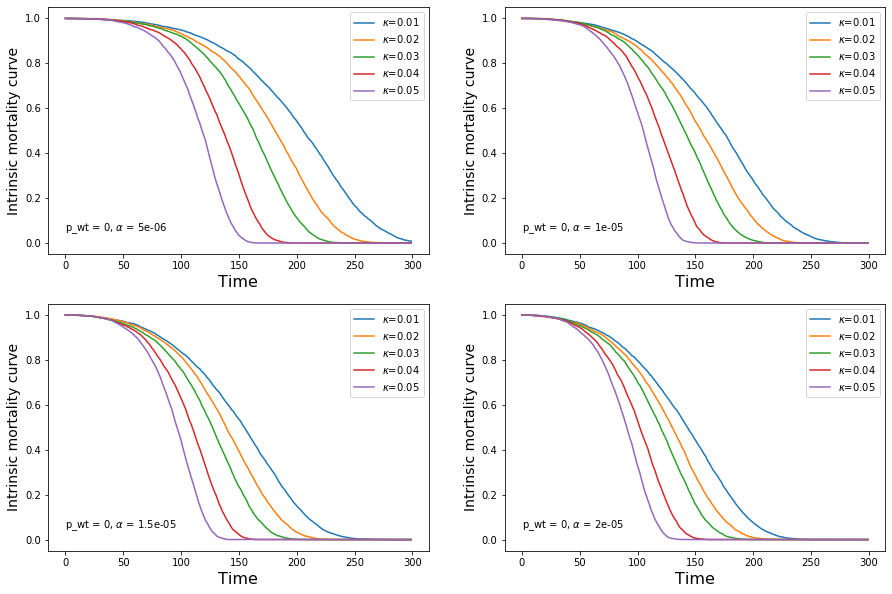

In [49]:
#Calculates the intrinsic mortality curve
#varies alpha(4) and kappa(5) values
#Note the difference between extrinsic and intrinsic mortality. The curves below mimics the natural condition, ie. the probability of dying by 
#extrinsic mortality when your fitness gets reduced due to somatic damage. But you do not necessarily die from this damage. So how can this be reconciled with
#the probability of dying directly from intrinsic mortality? Is reduced capacity to run and fight etc a proxy for intrinsic mortality death. If alpha is allowed
#to decrease? Or can one just say that the curves are lower bounds for intrinsic mortality? p_wt + (1-constant) (alpha*D_mut[]) could then define an upper bound.
#Reasonable to assume that the saving of somatic maintenance energy is stretched to the maximum

#p_wt = 0.00001
#epsilon = 0.0002
#alpha = 0.000005 #0.05
nind = 1000; Tmax = 300; nrepeats_mut = 5
counter1 = 0

a_conv = 1.0 #0.5
#H1_mut_all = np.zeros((20*nrepeats_mut,Tmax))

C = np.arange(0,Tmax,1,dtype = int)

fig = plt.subplots(2,2,figsize=(15,10))

for u in range(4):
    print()
    if u == 0:
        alpha = 0.000005*a_conv
        plt.subplot(221)
    if u == 1:
        alpha = 0.00001*a_conv
        plt.subplot(222) 
    if u == 2:
        alpha = 0.000015*a_conv
        plt.subplot(223)
    if u == 3:
        alpha = 0.00002*a_conv
        plt.subplot(224)
    
    for m in range(5):
        H1_mut = np.zeros((nrepeats_mut,Tmax),dtype = int)
        for k in range(nrepeats_mut):
            counter1 = counter1 + 1
            s = np.ones((Tmax,nind),dtype = int); 
            for j in range(1,Tmax):
                for i in range(nind):
                    ran = np.random.rand(1)
                    if s[j-1,i] == 1:
                        #if ran < p_wt + alpha*D_mut[m,j]:
                        if ran < alpha*D_mut[m,j]:
                            s[j,i] = 0
                    if s[j-1,i] == 0:
                        s[j,i] = 0
            H1_mut[k,:] = np.sum(s, axis = 1)
            #H1_mut_all[counter1-1,:] = np.sum(s, axis = 1)

        mean_mut = np.mean(H1_mut,axis = 0)
        idx_900 = (np.abs(mean_mut - 900)).argmin()
        idx_1 = (np.abs(mean_mut - 1)).argmin()
        frac_90 = idx_900/idx_1
        print(idx_900+1)
        print(idx_1+1)
        print(frac_90)
        print()

        if m==0:
            l1, = plt.plot(C,mean_mut/nind)
        if m==1:
            l2, = plt.plot(C,mean_mut/nind)
        if m==2:
            l3, = plt.plot(C,mean_mut/nind)
        if m==3:
            l4, = plt.plot(C,mean_mut/nind)
        if m==4:
            l5, = plt.plot(C,mean_mut/nind)
    plt.legend((l1,l2,l3,l4,l5),('$\kappa$=0.02','$\kappa$=0.025', '$\kappa$=0.03', '$\kappa$=0.04', '$\kappa$=0.05'))
    plt.xlabel("Time",fontsize = 16)
    plt.ylabel("Intrinsic mortality curve",fontsize=14);
    #plt.plot([0,Tmax],[0,0],'r--');
    ymin, ymax = plt.gca().get_ylim()
    plt.text(0,0.05*ymax, 'p_wt = 0, $\\alpha$ = {}'.format(alpha))
    #plt.text(35,0.9*ymax, "$\epsilon$ = {}, $\alpha$ = {}".format(epsilon,alpha)) 
    #Hanna Froy, Jane Reed
    #Under which conditions will one get a marked proportion of aged individuals

if curve needs to flatten more in the beginning, what needs to be done? lower kappa and an exponent for D(t)- square root?

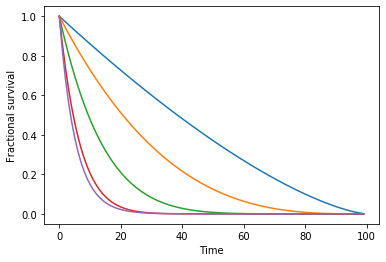

In [85]:
# Need for a more flexible survival curve. The Kumaraswamy distribution might do it.

# In probability and statistics, the Kumaraswamy's double bounded distribution is a family of continuous 
# probability distributions defined on the interval (0,1). It is similar to the Beta distribution, but much 
# simpler to use especially in simulation studies since its probability density function, cumulative distribution 
# function and quantile functions can be expressed in closed form. This distribution was originally proposed by 
# Poondi Kumaraswamy for variables that are lower and upper bounded. https://en.wikipedia.org/wiki/Kumaraswamy_distribution

f = plt.figure()
f.set_figheight(4)
f.set_figwidth(6)
plt.xlabel("Time")
plt.ylabel("Fractional survival") 
#x = np.arange(0,Tmax,1)
x = np.arange(0,1,0.01)
#y = ((l**k * x**(k-1) * np.exp(-l*x))/math.factorial(k-1))/norm
for i in range(5):
    if i == 0:
        a = 1; b = 2.43
        norm = a*b*0.00001**(a-1)*(1-0.00001**a)**(b-1)
        y_24 = a*b*x**(a-1)*(1-x**a)**(b-1)/norm 
        y = y_24
    if i == 1:
        a = 1; b = 4.0
        norm = a*b*0.00001**(a-1)*(1-0.00001**a)**(b-1)
        y_40 = a*b*x**(a-1)*(1-x**a)**(b-1)/norm
        y = y_40
    if i == 2:
        a = 1; b = 8.0
        norm = a*b*0.00001**(a-1)*(1-0.00001**a)**(b-1)
        y_80 = a*b*x**(a-1)*(1-x**a)**(b-1)/norm
        y = y_80
    if i == 3:
        a = 1; b = 16.0
        norm = a*b*0.00001**(a-1)*(1-0.00001**a)**(b-1)
        y_160 = a*b*x**(a-1)*(1-x**a)**(b-1)/norm
        y = y_160
    if i == 4:
        x = np.arange(0,Tmax,1)
        y_exp = np.exp(-0.19*x)
        y = y_exp
    
    #y = a*b*x**(a-1)*(1-x**a)**(b-1)/norm
    plt.plot(y)

The cohort wild type survival function is now given by:

$x_{wt}(n+1) = (1-p_{wt}(n))*x_{wt}(n)$,

where 

$p_{wt}(n) = \frac{(K(n)-K(n+1))}{K(n)}$ 

is the fractional loss in the time interval (t,t+1) obtained from the Kumaraswamy function 

$K(x;a,b,\zeta)= \frac{a b}\zeta x^{a-1} (1-x^a)^{b-1}$, where

$a,b,\zeta$ are constants and $\zeta = K(0.00001)$.

The snippet below plots the wild type cohorts based on the survival curves above, with a cut-off time when there is 1 individual left in the population.

100
91
64
38
37


Text(0, 0.5, 'Wild type cohort size')

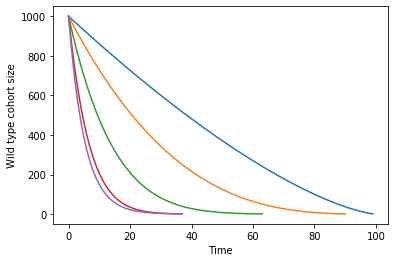

In [290]:
Tmax = 100; 
p_wt_24 = np.zeros(Tmax); x_wt_24 = np.zeros(Tmax); x_wt_24[0] = 1000;
p_wt_40 = np.zeros(Tmax); x_wt_40 = np.zeros(Tmax); x_wt_40[0] = 1000;
p_wt_80 = np.zeros(Tmax); x_wt_80 = np.zeros(Tmax); x_wt_80[0] = 1000;
p_wt_160 = np.zeros(Tmax); x_wt_160 = np.zeros(Tmax); x_wt_160[0] = 1000;
p_wt_exp = np.zeros(Tmax); x_wt_exp = np.zeros(Tmax); x_wt_exp[0] = 1000;

#for k in range(len(y)-1):
for k in range(Tmax-1):   
    p_wt_24[k]= (y_24[k]-y_24[k+1])/y_24[k]
    x_wt_24[k+1] = (1-p_wt_24[k])*x_wt_24[k]
    
    p_wt_40[k]= (y_40[k]-y_40[k+1])/y_40[k]
    x_wt_40[k+1] = (1-p_wt_40[k])*x_wt_40[k]
    
    p_wt_80[k]= (y_80[k]-y_80[k+1])/y_80[k]
    x_wt_80[k+1] = (1-p_wt_80[k])*x_wt_80[k]
    
    p_wt_160[k]= (y_160[k]-y_160[k+1])/y_160[k]
    x_wt_160[k+1] = (1-p_wt_160[k])*x_wt_160[k]
    
    p_wt_exp[k]= (y_exp[k]-y_exp[k+1])/y_exp[k]
    #p_wt_exp[k]= 0.19
    x_wt_exp[k+1] = (1-p_wt_exp[k])*x_wt_exp[k]
    
    

idx_24 = (np.abs(x_wt_24 - 1.0)).argmin() #find the index of the x_wt element that has the value closest to 1
idx_40 = (np.abs(x_wt_40 - 1.0)).argmin()
idx_80 = (np.abs(x_wt_80 - 1.0)).argmin()
idx_160 = (np.abs(x_wt_160 - 1.0)).argmin()
idx_exp = (np.abs(x_wt_exp - 1.0)).argmin()

print(idx_24+1)
print(idx_40+1)
print(idx_80+1)
print(idx_160+1)
print(idx_exp+1)

f = plt.figure()
f.set_figheight(4)
f.set_figwidth(6)
x = np.arange(0,Tmax,1)
plt.plot(x_wt_24[0:idx_24+1])
plt.plot(x_wt_40[0:idx_40+1])
plt.plot(x_wt_80[0:idx_80+1])
plt.plot(x_wt_160[0:idx_160+1])
plt.plot(x_wt_exp[0:idx_exp+1])
plt.xlabel("Time")
plt.ylabel("Wild type cohort size") 

In [ ]:
p_wt_exp[0]
x_wt_exp[1]
y_exp[0]
y_exp[1]

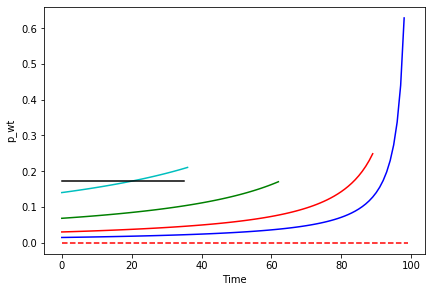

In [291]:
plt.figure(figsize=(15,10))

#x = np.arange(0,idx_24,1)
plt.subplot(221)
x = np.arange(0,idx_24,1)
plt.plot(x,p_wt_24[0:idx_24], 'b')

x = np.arange(0,idx_40,1)
plt.plot(x,p_wt_40[0:idx_40], 'r')

x = np.arange(0,idx_80,1)
plt.plot(x,p_wt_80[0:idx_80], 'g')

x = np.arange(0,idx_160,1)
plt.plot(x,p_wt_160[0:idx_160], 'c')

x = np.arange(0,idx_exp,1)
plt.plot(x,p_wt_exp[0:idx_exp], 'k')

plt.xlabel("Time")
plt.ylabel("p_wt");
#plt.ylim((-25,15));
plt.plot([0,idx_24],[0,0],'r--');

In [295]:
# This snippet plots the mutant cohorts based on the survival curves above, with a cut-off time when there is 1 individual left in the population.
Tmax = 100;
epsilon = 0.01 #0.02
alpha = 0.03 #0.05
p_mut_24 = np.zeros(Tmax); x_mut_24 = np.zeros(Tmax); x_mut_24[0] = 1000;
p_mut_40 = np.zeros(Tmax); x_mut_40 = np.zeros(Tmax); x_mut_40[0] = 1000;
p_mut_80 = np.zeros(Tmax); x_mut_80 = np.zeros(Tmax); x_mut_80[0] = 1000;
p_mut_160 = np.zeros(Tmax); x_mut_160 = np.zeros(Tmax); x_mut_160[0] = 1000;

for k in range(len(y)-1):
    #p_mut_24[k] = (y_24[k]-y_24[k+1])/y_24[k]
    #p_mut_24[k] = (1-epsilon)*p_wt_24[k]
    D_norm[k] = ((1+kappa)**(k+1) - 1)/((1+kappa)**(Tmax+1) - 1)
    
    p_mut_24[k] = (1-epsilon)*p_wt_24[k] + alpha*D_norm[k]
    x_mut_24[k+1] = (1-p_mut_24[k])*x_mut_24[k]
    
    p_mut_40[k] = (1-epsilon)*p_wt_40[k] + alpha*D_norm[k]
    x_mut_40[k+1] = (1-p_mut_40[k])*x_mut_40[k]
    
    p_mut_80[k] = (1-epsilon)*p_wt_80[k] + alpha*D_norm[k]
    x_mut_80[k+1] = (1-p_mut_80[k])*x_mut_80[k]
    
    p_mut_160[k] = (1-epsilon)*p_wt_160[k] + alpha*D_norm[k]
    x_mut_160[k+1] = (1-p_mut_160[k])*x_mut_160[k]
    

idx_24 = (np.abs(x_mut_24 - 1.0)).argmin() #find the index of the x_wt element that has the value closest to 1
idx_40 = (np.abs(x_mut_40 - 1.0)).argmin()
idx_80 = (np.abs(x_mut_80 - 1.0)).argmin()
idx_160 = (np.abs(x_mut_160 - 1.0)).argmin()

print(idx_24+1)
print(idx_40+1)
print(idx_80+1)
print(idx_160+1)

f = plt.figure()
f.set_figheight(4)
f.set_figwidth(6)
x = np.arange(0,Tmax,1)
plt.plot(x_mut_24[0:idx_24+1])
plt.plot(x_mut_40[0:idx_40+1])
plt.plot(x_mut_80[0:idx_80+1])
plt.plot(x_mut_160[0:idx_160+1])
plt.xlabel("Time")
plt.ylabel("Mutant cohort size"); 

TypeError: unsupported operand type(s) for +: 'int' and 'list'

NameError: name 'x_mut_24' is not defined

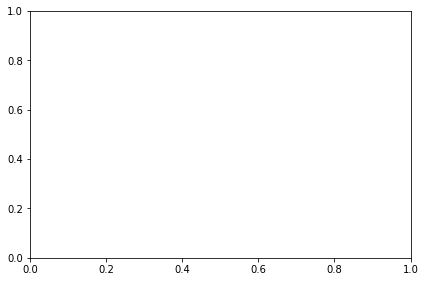

In [293]:
#Plotting the difference between the mutant and wild type cohorts as a function of time
# Make four plots 

#plt.figure
plt.figure(figsize=(15,10))

x = np.arange(0,idx_24,1)
plt.subplot(221)
plt.plot(x,x_mut_24[0:idx_24]-x_wt_24[0:idx_24], 'b')
plt.xlabel("Time")
plt.ylabel("# of (mutant - wildtype) individuals");
plt.ylim((-25,15));
plt.plot([0,idx_24],[0,0],'r--');
#idx = (np.abs(Diff_mut_wt[2:99] - 0.01)).argmin() 
#print("Diff (mut - wt) turns negative at T =  %.2f" % (idx+1))

x = np.arange(0,idx_40,1)
plt.subplot(222)
plt.plot(x,x_mut_40[0:idx_40]-x_wt_40[0:idx_40], 'r')
plt.xlabel("Time")
plt.ylabel("# of (mutant - wildtype) individuals");
plt.ylim((-15,15));
plt.plot([0,idx_40],[0,0],'r--');

x = np.arange(0,idx_80,1)
plt.subplot(223)
plt.plot(x,x_mut_80[0:idx_80]-x_wt_80[0:idx_80], 'g')
plt.xlabel("Time")
plt.ylabel("# of (mutant - wildtype) individuals");
plt.ylim((-15,15));
plt.plot([0,idx_80],[0,0],'r--');

x = np.arange(0,idx_160,1)
plt.subplot(224)
plt.plot(x,x_mut_160[0:idx_160]-x_wt_160[0:idx_160], 'c')
plt.xlabel("Time")
plt.ylabel("# of (mutant - wildtype) individuals");
plt.ylim((-15,15));
plt.plot([0,idx_160],[0,0],'r--');

#plt.tight_layout()
plt.show()

In [294]:
##### Adjust the snippet above to calculate r and R0 ratios between wild type and mutant
from scipy.optimize import brentq
#Taken from: https://scipython.com/book/chapter-8-scipy/examples/solving-the-euler-lotka-equation/
#const_fecund = 0.12 #0.075


#m(k) = the mean number of live females born per time period per female alive during the k period.
#m = const_fecund*np.ones(Tmax)
R_wt = np.zeros(4)
R_mut = np.zeros(4)
rwt = np.zeros(4)
rmut = np.zeros(4)

for i in range(4):
    if i == 0:
        const_fecund = 0.0245
        m = const_fecund*np.ones(Tmax)
        f_wt = (x_wt_24/1000.0)*m
        f_mut = (x_mut_24/1000.0)*m
    if i == 1:
        const_fecund = 0.04
        m = const_fecund*np.ones(Tmax)
        f_wt = (x_wt_40/1000.0)*m
        f_mut = (x_mut_40/1000.0)*m
    if i == 2:
        const_fecund = 0.077
        m = const_fecund*np.ones(Tmax)
        f_wt = (x_wt_80/1000.0)*m
        f_mut = (x_mut_80/1000.0)*m
    if i == 3:
        const_fecund = 0.15
        m = const_fecund*np.ones(Tmax)
        f_wt = (x_wt_160/1000.0)*m
        f_mut = (x_mut_160/1000.0)*m

    R0_wt = np.sum(f_wt)
    R0_mut = np.sum(f_mut)
    R_wt[i]= R0_wt
    R_mut[i] = R0_mut

    x = np.linspace(1, int(100), 1)

    # The Euler-Lotka equation: find the one real root in r                                                      
    def func(r):
        return np.sum(f * np.exp(-r * x)) - 1

    for k in range(2):
        # Bracket the root and solve with scipy.optimize.brentq
        #a, b = -2, 8
        #r = brentq(func, a, b)
        if k == 0:
            a, b = -2, 8
            f = f_wt
            r = brentq(func, a, b)
            r_wt = r
            rwt[i] = r_wt
        if k == 1:
            a, b = -2, 8
            f = f_mut
            r = brentq(func, a, b)
            r_mut = r
            rmut[i] = r_mut
        
    print(R0_wt,r_wt,R0_mut,r_mut)
    print()

plt.figure(figsize=(10,5))
plt.subplot(121)
# width of the bars
barWidth = 0.3
 
# Choose the height of the blue bars
bars1 = R_wt
 
# Choose the height of the cyan bars
bars2 = R_mut
 
# The x position of bars
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Create blue bars
plt.bar(r1, bars1, width = barWidth, color = 'blue', edgecolor = 'black',label='wild type')
 
# Create cyan bars
plt.bar(r2, bars2, width = barWidth, color = 'cyan', edgecolor = 'black', label='mutant')
 
# general layout
plt.xticks([r + barWidth for r in range(len(bars1))], ['R0_24', 'R0_40', 'R0_80', 'R0_160'])
#plt.ylabel('height')
plt.legend()

plt.subplot(122)
# width of the bars
barWidth = 0.3
 
# Choose the height of the blue bars
bars1 = rwt
 
# Choose the height of the cyan bars
bars2 = rmut
 
# The x position of bars
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Create blue bars
plt.bar(r1, bars1, width = barWidth, color = 'blue', edgecolor = 'black',label='wild type')
 
# Create cyan bars
plt.bar(r2, bars2, width = barWidth, color = 'cyan', edgecolor = 'black', label='mutant')
 
# general layout
plt.xticks([r + barWidth for r in range(len(bars1))], ['r_24', 'r_40', 'r_80', 'r_160'])
#plt.ylabel('height')
plt.legend()
 
# Show graphic
plt.show()


# How will the mortality curve change when the mutant strategy is adopted? 

NameError: name 'x_mut_24' is not defined

In [ ]:
#Introduce a non-constant fecundity curve
#Calculate Kumaraswamy distribution values to feed m - 
#the mean number of live females born per time period per female alive during the k period.

#Kumaraswamy's double bounded distribution is a family of continuous probability distributions 
#defined on the interval [0,1]. It is similar to the Beta distribution, but much simpler to use 
#especially in simulation studies due to the simple closed form of both its probability density 
#function and cumulative distribution function. This distribution was originally proposed by 
#Poondi Kumaraswamy for variables that are lower and upper bounded.

#Maximum # of progeny can then be defined by making use of a constant. But the areas under the curves should 
#be the same.

a = [5, 4, 3, 2]
b = [0.5, 0.75, 1.0, 1.25]
arr = np.linspace(0,1,int(Tmax))

for u in range(4):
    #a = m[u]
    #b = n[u]
    def Kumaraswamy(x):
        return (1-(1-x**a[u])**b[u])
    m_func = 1.0 - np.apply_along_axis(Kumaraswamy,0,arr)
    
    if u == 0:
        #cross_pwt = [80,65,55,48,43]
        m1 = m_func
    if u == 1:
        #cross_pwt = [54,46,40,36,32]
        m2 = m_func
    if u == 2:
        #cross_pwt = [42,36,32,29,27]
        m3 = m_func
    if u == 3:
        #cross_pwt = [34,30,27,25,23]
        m4 = m_func
    print(np.trapz(m_func))   
#print(vfunc)   
fig = plt.subplots(2,2,figsize=(15,10))
#plt.figure(1)
plt.subplot(221)
plt.plot(m1, 'r-')
plt.xlabel("Time",fontsize=18)
plt.ylabel("Fraction of max fecundity",fontsize=18)

plt.subplot(222)
plt.plot(m2, 'r-')
plt.xlabel("Time",fontsize=18)
plt.ylabel("Fraction of max fecundity",fontsize=18) 

plt.subplot(223)
plt.plot(m3, 'r-')
plt.xlabel("Time",fontsize=18)
plt.ylabel("Fraction of max fecundity",fontsize=18) 

plt.subplot(224)
plt.plot(m4, 'r-')
plt.xlabel("Time",fontsize=18)
plt.ylabel("Fraction of max fecundity",fontsize=18) 

plt.tight_layout()
plt.show()
#print(np.shape(m_func))

#from IPython.display import Image
#PATH = "/Dropbox/RiskyAgeing/Jupyter_blues/"
#PATH = "/Jupyter_blues/"
#Image(filename = "Beta.png", width=400, height=400)

